In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.multitest import multipletests
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF

In [2]:
full_data = pd.read_csv('Full Data.txt', index_col = [0])

In [3]:
full_data

,gender,ajcc_pathologic_tumor_stage,tumor_status,DSS,DSS.time,TP53,TTN,FAT1,MUC16,CSMD3,...,NIPBL,CEACAM5,CEACAM6,CLCA4,EGFR,Missense_Mutation,Nonsense_Mutation,Nonstop_Mutation,Splice_Site,age
patient_id,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,1,0,0,0.0,0.279452,822.678,1157.3300,1620.71,1004.4700,1.2325,...,1595.440,56.0776,423.3550,502.2340,722.847,92,8,0,2,1
TCGA-BA-4074,1,0,1,1.0,1.265753,1805.510,103.6870,6415.45,17.3422,0.3854,...,1605.890,153.3820,275.9330,12.7176,1267.900,106,8,0,1,1
TCGA-BA-4075,1,1,1,1.0,0.775342,383.760,295.9180,4162.40,1.0720,36.9824,...,907.410,18.2232,45.5581,10.1836,4833.430,113,10,0,4,0
TCGA-BA-4077,0,0,1,1.0,3.106849,1929.260,207.3870,7246.87,432.6270,0.0000,...,1174.690,2392.6900,2437.9200,720.8850,2371.940,234,20,0,6,0
TCGA-BA-5149,1,0,1,1.0,2.208219,165.298,347.9540,8848.73,110.5410,0.3422,...,1798.770,37.3032,447.6390,5.4757,6934.280,96,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JO,0,0,1,1.0,1.728767,1604.880,176.1930,1881.36,347.7040,2.8008,...,854.256,1498.8500,2014.6000,82.8248,530.911,135,9,0,4,1
TCGA-UF-A7JS,1,0,1,1.0,1.863014,2457.400,1379.4300,1339.31,243.6470,19.4320,...,982.063,358.7440,294.4690,32.8849,246.637,50,1,0,1,1
TCGA-UF-A7JT,0,0,1,1.0,2.720548,1684.850,149.5190,3430.74,213.8530,14.2857,...,1009.520,49.7835,209.5240,200.4330,790.905,152,10,0,3,1


In [6]:
time_limit = range(1,11)
n_components = 6  # Specify the number of components
nmf = NMF(n_components=n_components)

In [9]:
def classifcation_svm(df):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # SVM
   
    # Define the model
    svm_clf = svm.SVC()

    # Train the model
    svm_clf.fit(X_train, y_train)
   
    # Predict on the test set
    svm_predictions = svm_clf.predict(X_test)
    accuracy = accuracy_score(y_test, svm_predictions)
    roc_auc = roc_auc_score(y_test, svm_predictions)

    return accuracy, roc_auc, X_test, y_test

    # Evaluate the model
    #return accuracy_score(y_test, svm_predictions)
    #print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

In [6]:
def classifcation_svm_kernel(df):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # SVM
   
    # Define the model
    svm_clf = svm.SVC(kernel='linear')

    # Train the model
    svm_clf.fit(X_train, y_train)
   
    # Predict on the test set
    svm_predictions = svm_clf.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, svm_predictions)
    #print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
for i in time_limit:
    data = full_data[full_data['DSS.time'] <= i]
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
    df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
    lis = []
    for k in range(100):
        accuracy = classifcation_svm(df_reduced)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    mean_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
    print('For time limit ' + str(i) + ' and nmf features')
    print('SVM Accuracy ' + str(mean_acc))
    print(f'ROC AUC: {mean_roc_auc}')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_final, svm_clf.decision_function(X_test_final))
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Time Limit: {time_limit})')
    plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

For time limit 5 and NMF features:
SVM Accuracy: 0.682375
ROC AUC: 0.49810480656347417


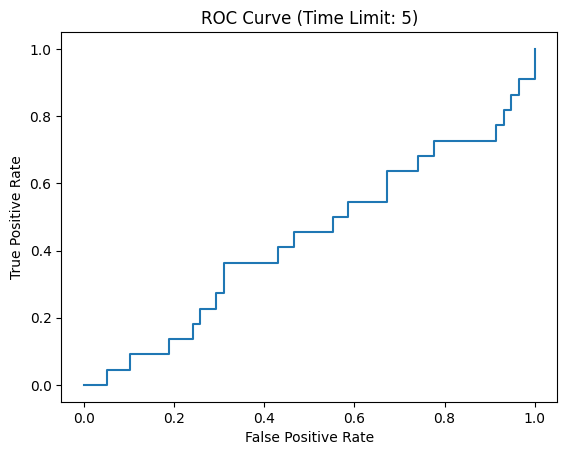

For time limit 10 and NMF features:
SVM Accuracy: 0.7026136363636365
ROC AUC: 0.499765625


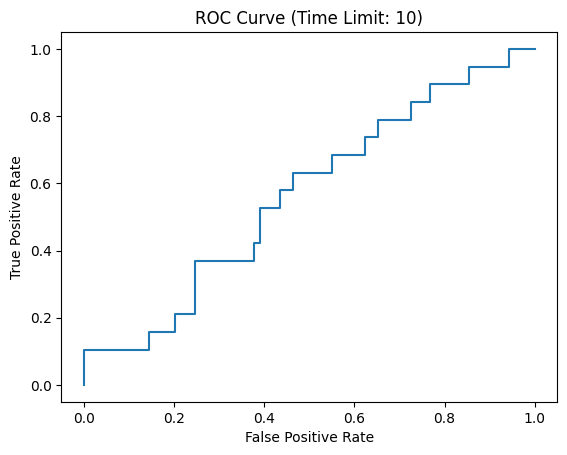

For time limit 15 and NMF features:
SVM Accuracy: 0.706888888888889
ROC AUC: 0.5


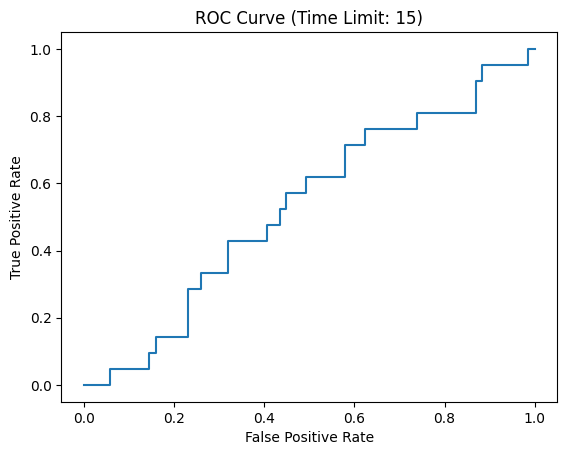

For time limit 20 and NMF features:
SVM Accuracy: 0.7051111111111112
ROC AUC: 0.499765625


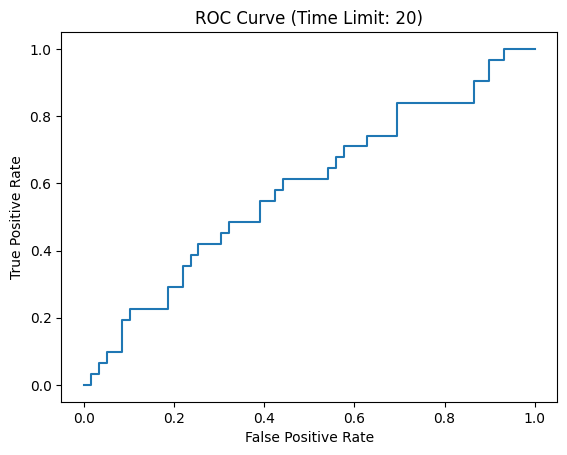

In [16]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the SVM classifier object
svm_clf = svm.SVC(kernel='linear')

def classification_svm_kernel(df):
    # Get features you select
    X = df.drop(columns=['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    svm_clf.fit(X_train, y_train)

    # Predict on the test set
    svm_predictions = svm_clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, svm_predictions)
    roc_auc = roc_auc_score(y_test, svm_predictions)

    return accuracy, roc_auc, X_test, y_test

# Define the time limits
time_limits = [5, 10, 15, 20]

# Perform classification and compute ROC AUC for each time limit
for time_limit in time_limits:
    data = full_data[full_data['DSS.time'] <= time_limit].reset_index(drop=True)
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns=['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = data['DSS']
    df_reduced['DSS.time'] = data['DSS.time']
    accuracy_list = []
    roc_auc_list = []
    X_test_final = None
    y_test_final = None
    for _ in range(100):
        accuracy, roc_auc, X_test, y_test = classification_svm_kernel(df_reduced)
        accuracy_list.append(accuracy)
        roc_auc_list.append(roc_auc)
        if X_test_final is None:
            X_test_final = X_test
            y_test_final = y_test
    
    mean_accuracy = sum(accuracy_list) / len(accuracy_list)
    mean_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
    print(f'For time limit {time_limit} and NMF features:')
    print(f'SVM Accuracy: {mean_accuracy}')
    print(f'ROC AUC: {mean_roc_auc}')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_final, svm_clf.decision_function(X_test_final))
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Time Limit: {time_limit})')
    plt.show()



Linear Kernel for SVM

In [8]:
for i in time_limit:
    data = full_data[full_data['DSS.time'] <= i]
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
    df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
    lis = []
    for k in range(100):
        accuracy = classifcation_svm_kernel(df_reduced)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    print('For time limit ' + str(i) + ' and nmf features')
    print('SVM linear accuracy ' + str(mean_acc))

For time limit 1 and nmf features
SVM linear accuracy 0.726818181818182
For time limit 2 and nmf features
SVM linear accuracy 0.7023076923076923
For time limit 3 and nmf features
SVM linear accuracy 0.6709090909090908
For time limit 4 and nmf features
SVM linear accuracy 0.7043835616438361
For time limit 5 and nmf features
SVM linear accuracy 0.7149999999999995
For time limit 6 and nmf features
SVM linear accuracy 0.7104819277108431
For time limit 7 and nmf features
SVM linear accuracy 0.7104705882352939
For time limit 8 and nmf features
SVM linear accuracy 0.7079310344827586
For time limit 9 and nmf features
SVM linear accuracy 0.7031818181818182
For time limit 10 and nmf features
SVM linear accuracy 0.7179545454545457


Poly kernel for SVM

In [9]:
def classifcation_svm_poly(df):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # SVM
   
    # Define the model
    svm_clf = svm.SVC(kernel='poly')

    # Train the model
    svm_clf.fit(X_train, y_train)
   
    # Predict on the test set
    svm_predictions = svm_clf.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, svm_predictions)
    #print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

In [10]:
for i in time_limit:
    data = full_data[full_data['DSS.time'] <= i]
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
    df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
    lis = []
    for k in range(100):
        accuracy = classifcation_svm_poly(df_reduced)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    print('For time limit ' + str(i) + ' and nmf features')
    print('SVM linear accuracy ' + str(mean_acc))

For time limit 1 and nmf features
SVM linear accuracy 0.7363636363636364
For time limit 2 and nmf features
SVM linear accuracy 0.6978846153846153
For time limit 3 and nmf features
SVM linear accuracy 0.6660606060606059
For time limit 4 and nmf features
SVM linear accuracy 0.6961643835616438
For time limit 5 and nmf features
SVM linear accuracy 0.7167500000000002
For time limit 6 and nmf features
SVM linear accuracy 0.7009638554216867
For time limit 7 and nmf features
SVM linear accuracy 0.7028235294117642
For time limit 8 and nmf features
SVM linear accuracy 0.7116091954022993
For time limit 9 and nmf features
SVM linear accuracy 0.7209090909090909
For time limit 10 and nmf features
SVM linear accuracy 0.7137499999999999


For time limit 1 and NMF features:
SVM Accuracy: 0.44772727272727264
ROC AUC: 0.5197352341286166


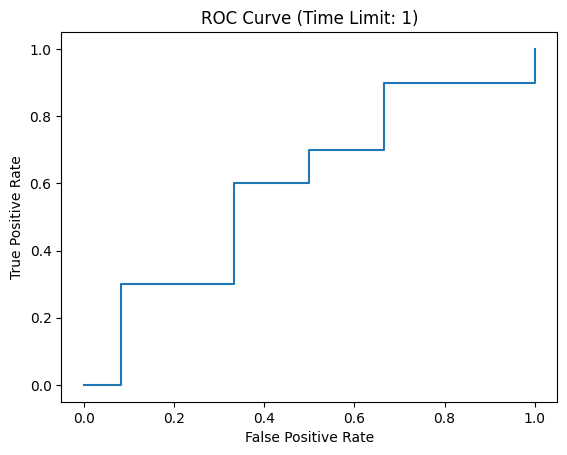

For time limit 2 and NMF features:
SVM Accuracy: 0.5748076923076924
ROC AUC: 0.498402476303945


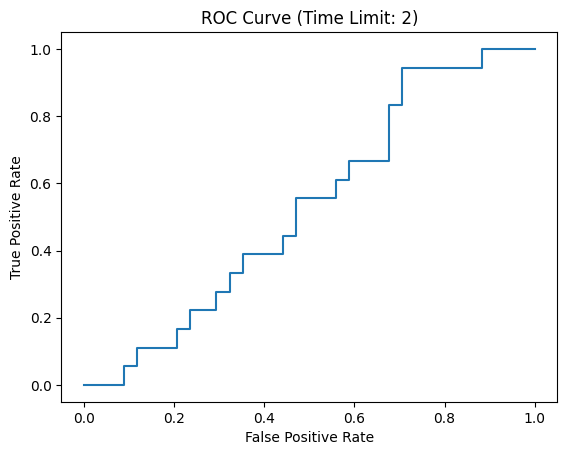

For time limit 3 and NMF features:
SVM Accuracy: 0.6362121212121213
ROC AUC: 0.49585222442198434


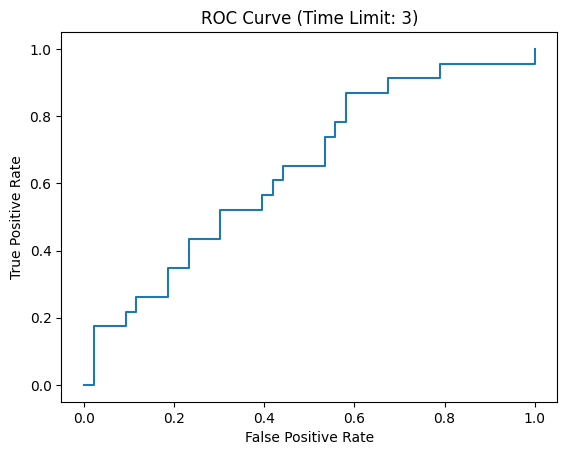

For time limit 5 and NMF features:
SVM Accuracy: 0.675
ROC AUC: 0.4956792006881585


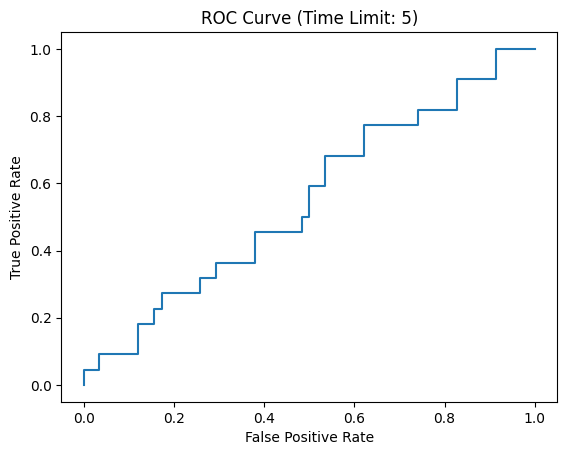

For time limit 10 and NMF features:
SVM Accuracy: 0.6876136363636367
ROC AUC: 0.4902205139022018


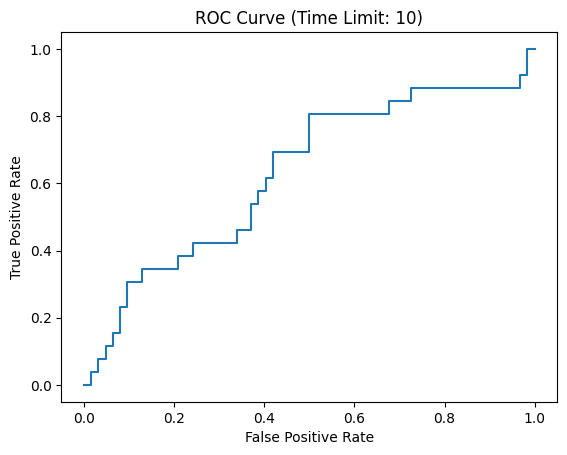

In [40]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the SVM classifier object
svm_clf = svm.SVC(kernel='poly')

def classification_svm_kernel(df):
    # Get features you select
    #X=df[['gender', 'ajcc_pathologic_tumor_stage','DSS', 'tumor_status','TP53',	'TTN',	'FAT1',	'MUC16','CLCA4','EGFR','Missense_Mutation',	'Nonsense_Mutation',	'Nonstop_Mutation',	'Splice_Site',	'age']]  # Replace with the actual feature columns
    X = df.drop(columns=['DSS.time', 'DSS'])
    #X=df
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    svm_clf.fit(X_train, y_train)

    # Predict on the test set
    svm_predictions = svm_clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, svm_predictions)
    roc_auc = roc_auc_score(y_test, svm_predictions)

    return accuracy, roc_auc, X_test, y_test

# Define the time limits
time_limits = [1,2,3,5, 10]

# Perform classification and compute ROC AUC for each time limit
for time_limit in time_limits:
    full_data=full_data[['gender', 'ajcc_pathologic_tumor_stage','DSS','DSS.time' ,'tumor_status','TP53',	'TTN',	'FAT1',	'MUC16','CLCA4','EGFR','Missense_Mutation',	'Nonsense_Mutation',	'Nonstop_Mutation',	'Splice_Site',	'age']]  # Replace with the actual feature columns
    data = full_data[full_data['DSS.time'] <= time_limit].reset_index(drop=True)
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns=['component_1', 'component_2', 'component_3','component_4','component_5','component_6'])
    df_reduced['DSS'] = data['DSS']
    df_reduced['DSS.time'] = data['DSS.time']
    accuracy_list = []
    roc_auc_list = []
    X_test_final = None
    y_test_final = None
    for _ in range(100):
        accuracy, roc_auc, X_test, y_test = classification_svm_kernel(df_reduced)
        accuracy_list.append(accuracy)
        roc_auc_list.append(roc_auc)
        if X_test_final is None:
            X_test_final = X_test
            y_test_final = y_test
    
    mean_accuracy = sum(accuracy_list) / len(accuracy_list)
    mean_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
    print(f'For time limit {time_limit} and NMF features:')
    print(f'SVM Accuracy: {mean_accuracy}')
    print(f'ROC AUC: {mean_roc_auc}')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_final, svm_clf.decision_function(X_test_final))
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Time Limit: {time_limit})')
    plt.show()



For time limit 1 and NMF features:
SVM Accuracy: 0.48499999999999993
ROC AUC: 0.549937034370858
Precision: 0.6586323953823953
Recall: 0.4652910961587431
Confusion Matrix:
[[5 4]
 [6 4]]


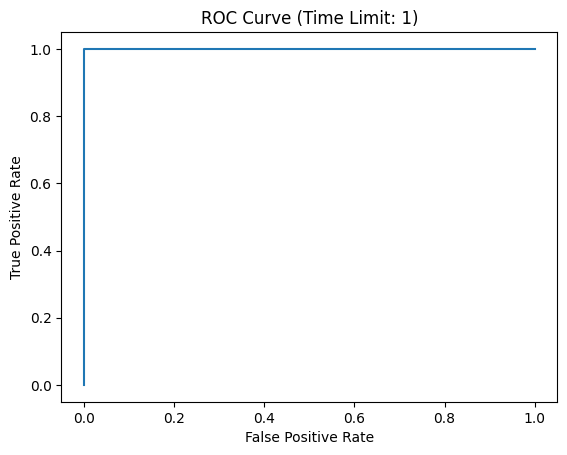

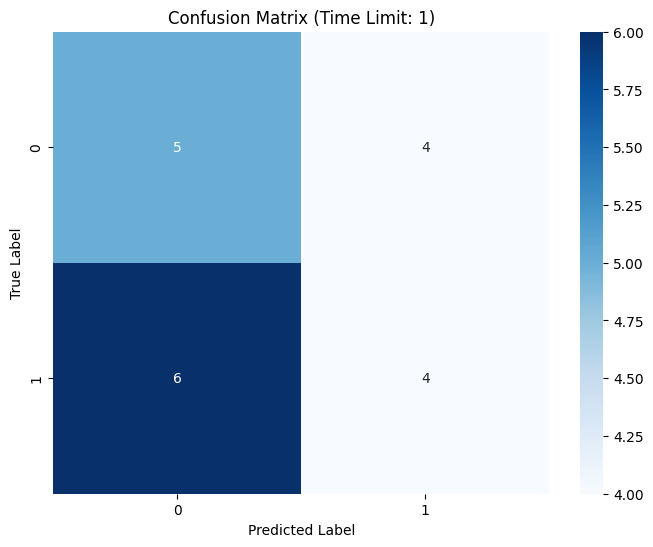

For time limit 2 and NMF features:
SVM Accuracy: 0.9101923076923074
ROC AUC: 0.9057774650209935
Precision: 0.9430292860399327
Recall: 0.8442914291491149
Confusion Matrix:
[[29  0]
 [ 3 17]]


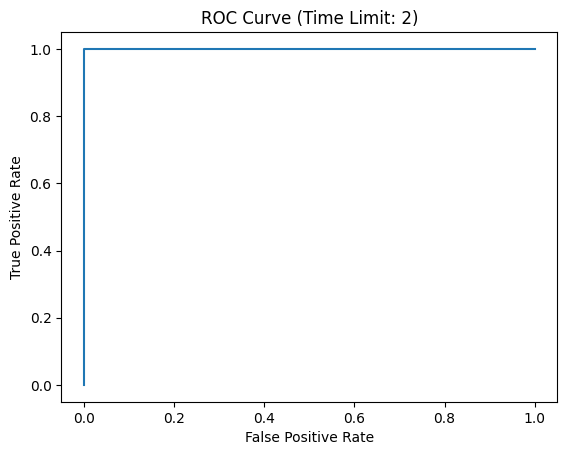

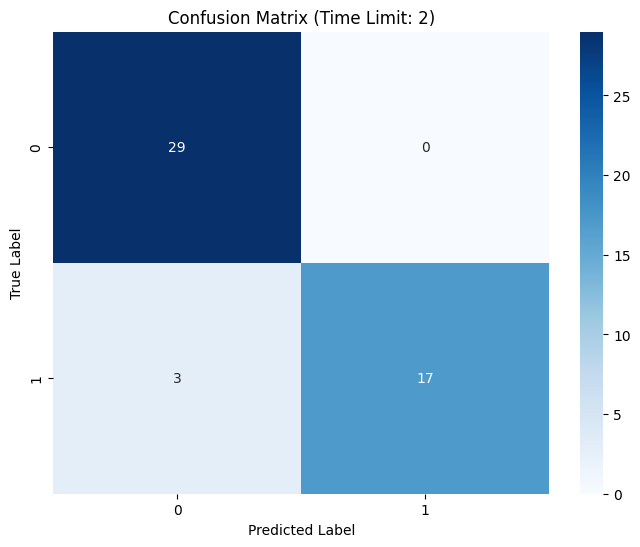

For time limit 4 and NMF features:
SVM Accuracy: 0.9717808219178089
ROC AUC: 0.9659881868200961
Precision: 0.9695983607619588
Recall: 0.9478973074993168
Confusion Matrix:
[[47  0]
 [ 1 23]]


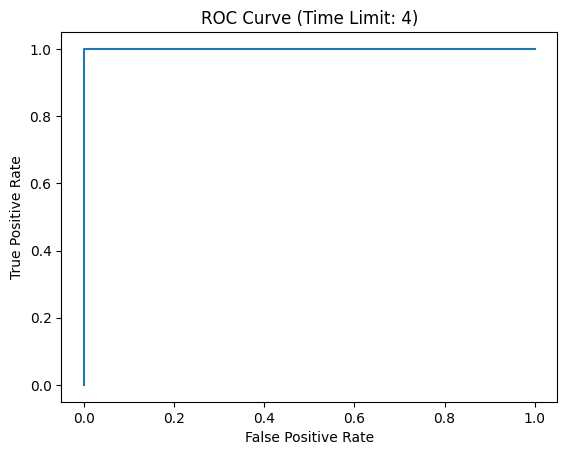

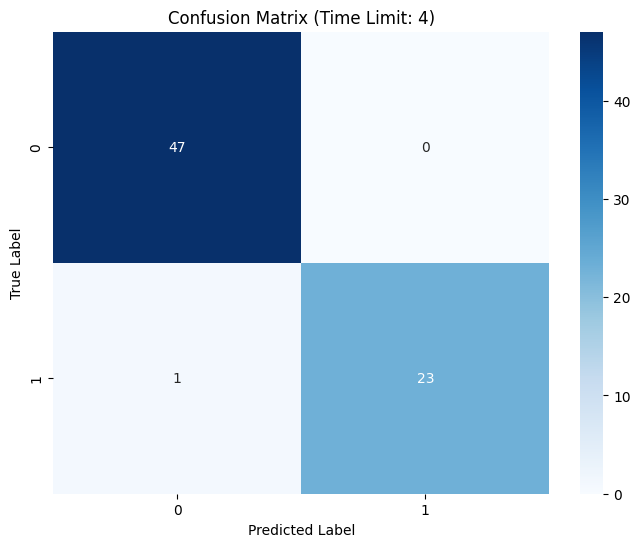

For time limit 5 and NMF features:
SVM Accuracy: 0.9773749999999992
ROC AUC: 0.9699182628313596
Precision: 0.9790133017383669
Recall: 0.9497894160327763
Confusion Matrix:
[[54  0]
 [ 1 24]]


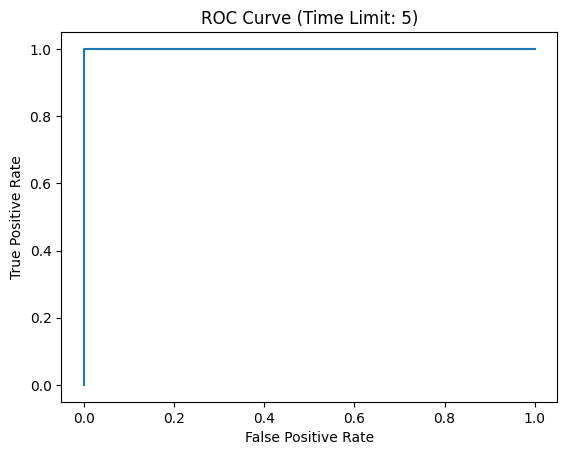

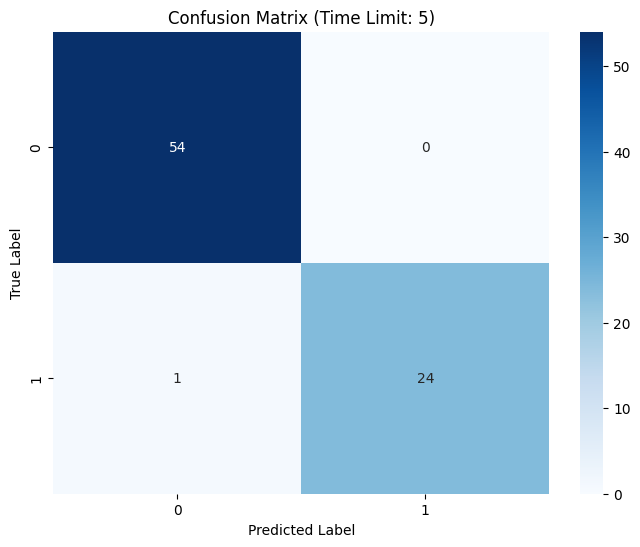

For time limit 6 and NMF features:
SVM Accuracy: 0.9745783132530125
ROC AUC: 0.964938909135153
Precision: 0.9776747349939512
Recall: 0.9393468552583503
Confusion Matrix:
[[56  0]
 [ 1 23]]


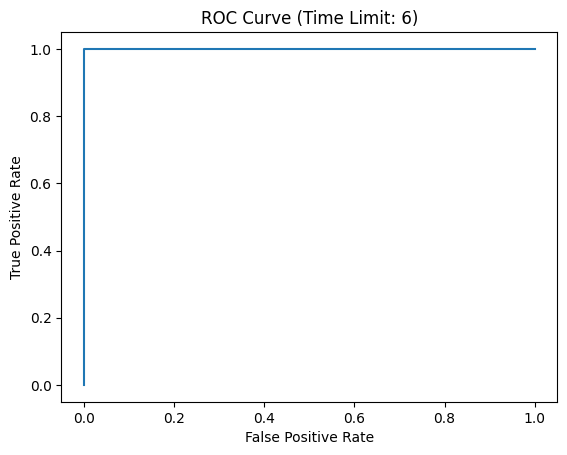

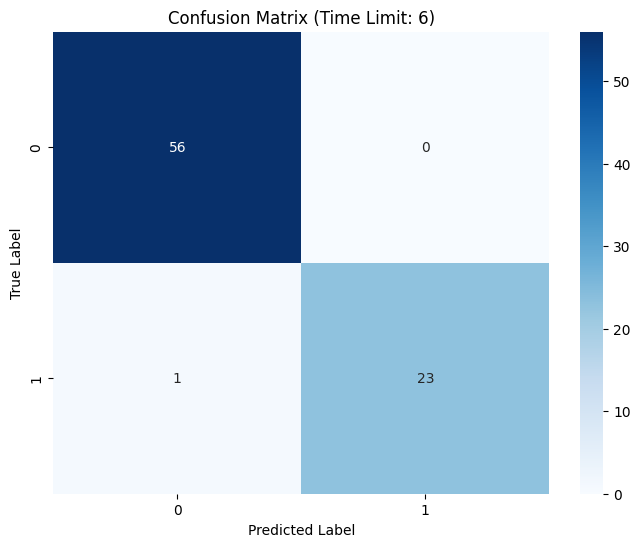

For time limit 8 and NMF features:
SVM Accuracy: 0.976206896551725
ROC AUC: 0.9672340364709462
Precision: 0.9796166672226829
Recall: 0.9429707815039715
Confusion Matrix:
[[59  0]
 [ 1 25]]


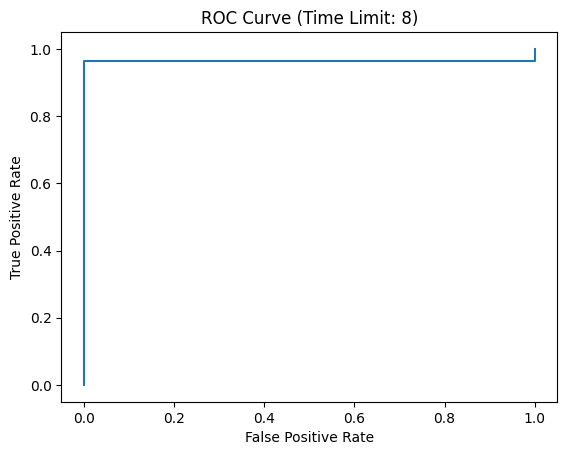

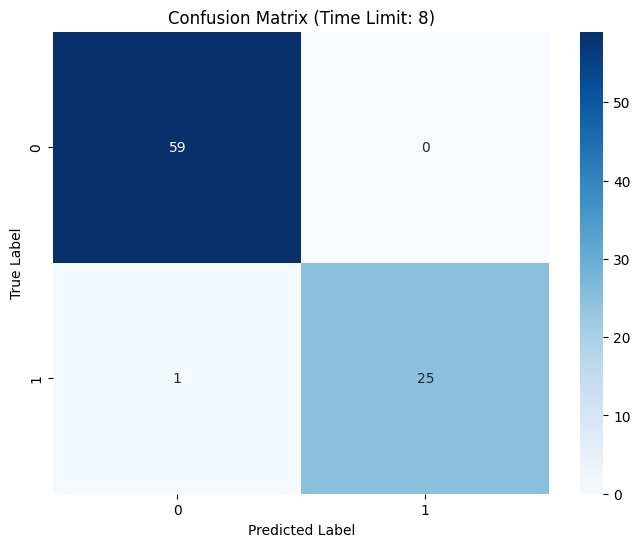

For time limit 7 and NMF features:
SVM Accuracy: 0.9750588235294105
ROC AUC: 0.966558470362421
Precision: 0.9781986888834876
Recall: 0.9429744381453372
Confusion Matrix:
[[57  0]
 [ 1 25]]


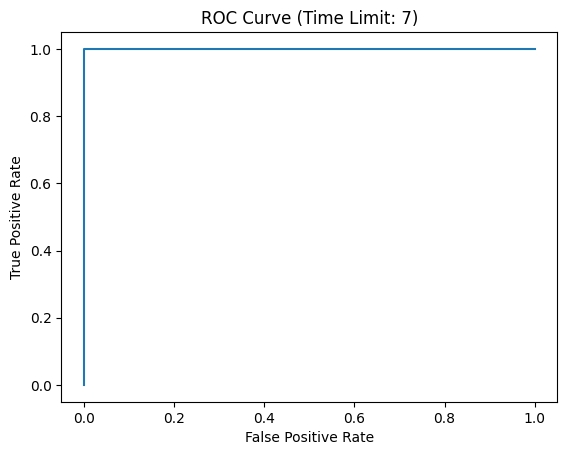

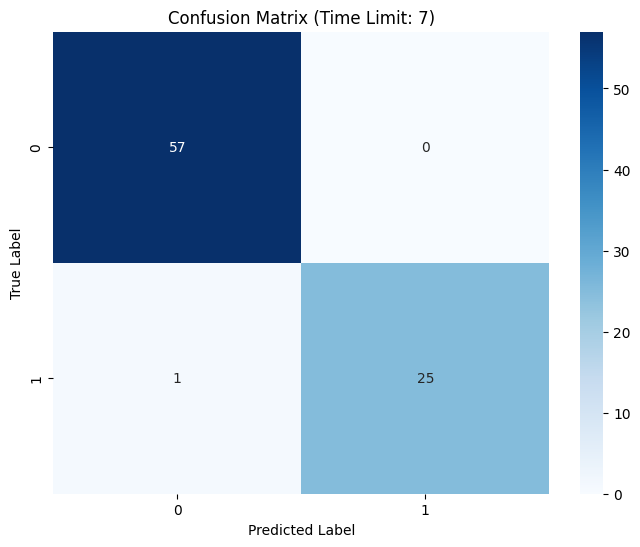

For time limit 10 and NMF features:
SVM Accuracy: 0.9745454545454549
ROC AUC: 0.9619554886815139
Precision: 0.9846218438708523
Recall: 0.929989574583996
Confusion Matrix:
[[61  0]
 [ 1 24]]


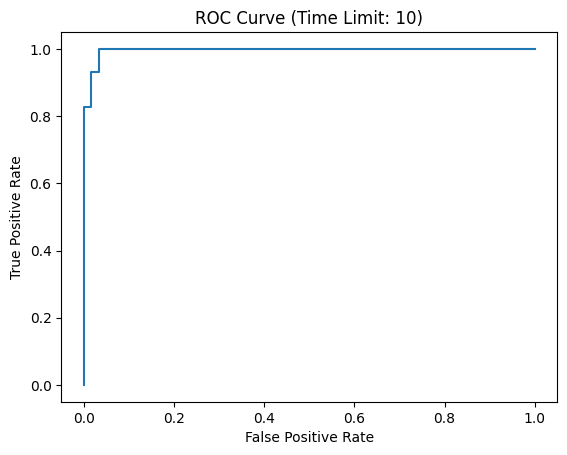

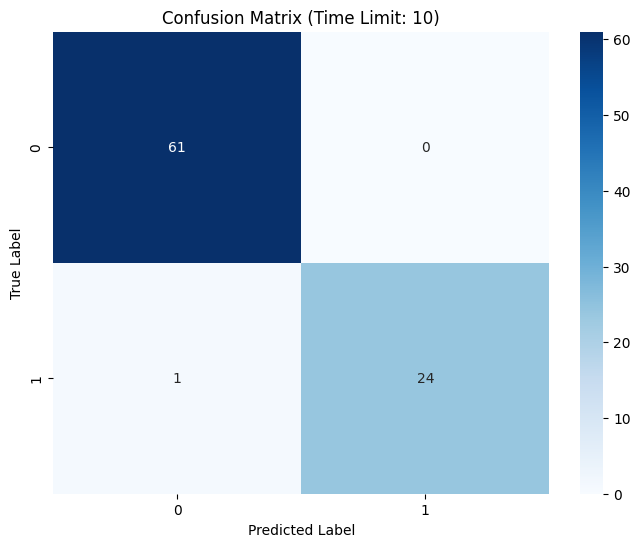

In [43]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Create the SVM classifier object
svm_clf = svm.SVC(kernel='rbf')

def classification_svm_kernel(df,y):
    # Get features you select
    #X = df.drop(columns=['DSS.time', 'DSS'])
    #y = df['DSS']
    X=df
    y=y
    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    svm_clf.fit(X_train, y_train)

    # Predict on the test set
    svm_predictions = svm_clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, svm_predictions)
    roc_auc = roc_auc_score(y_test, svm_predictions)
    precision = precision_score(y_test, svm_predictions)
    recall = recall_score(y_test, svm_predictions)
    confusion = confusion_matrix(y_test, svm_predictions)

    return accuracy, roc_auc, precision, recall, confusion, X_test, y_test
# Define the time limits
time_limits = [1,2,4,5,6,8, 7,10]

# Perform classification and compute ROC AUC for each time limit
for time_limit in time_limits:
    full_data=full_data[['gender', 'ajcc_pathologic_tumor_stage','DSS','DSS.time' ,'tumor_status','TP53',	'TTN',	'FAT1',	'MUC16','CLCA4','EGFR','Missense_Mutation',	'Nonsense_Mutation',	'Nonstop_Mutation',	'Splice_Site',	'age']]  # Replace with the actual feature columns
    data = full_data[full_data['DSS.time'] <= time_limit].reset_index(drop=True)
    X_reduced=data.drop(columns=['DSS.time', 'DSS'])
    y= data['DSS']
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns=['component_1', 'component_2', 'component_3','component_4','component_5','component_6'])
    df_reduced['DSS'] = data['DSS']
    df_reduced['DSS.time'] = data['DSS.time']
    accuracy_list = []
    roc_auc_list = []
    precision_list = []
    recall_list = []
    confusion_list = []
    X_test_final = None
    y_test_final = None
    for _ in range(100):
        accuracy, roc_auc, precision, recall, confusion, X_test, y_test = classification_svm_kernel(df_reduced,y)
        accuracy_list.append(accuracy)
        roc_auc_list.append(roc_auc)
        precision_list.append(precision)
        recall_list.append(recall)
        confusion_list.append(confusion)
        if X_test_final is None:
            X_test_final = X_test
            y_test_final = y_test
    
    mean_accuracy = sum(accuracy_list) / len(accuracy_list)
    mean_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
    mean_precision = sum(precision_list) / len(precision_list)
    mean_recall = sum(recall_list) / len(recall_list)
    mean_confusion = np.array(confusion_list).mean(axis=0).astype(int)

    print(f'For time limit {time_limit} and NMF features:')
    print(f'SVM Accuracy: {mean_accuracy}')
    print(f'ROC AUC: {mean_roc_auc}')
    print(f'Precision: {mean_precision}')
    print(f'Recall: {mean_recall}')
    print(f'Confusion Matrix:')
    print(mean_confusion)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_final, svm_clf.decision_function(X_test_final))
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Time Limit: {time_limit})')
    plt.show()

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(mean_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix (Time Limit: {time_limit})')
    plt.show()

Sigmoid Kernel

In [12]:
def classifcation_svm_sigmoid(df):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # SVM
   
    # Define the model
    svm_clf = svm.SVC(kernel='sigmoid')

    # Train the model
    svm_clf.fit(X_train, y_train)
   
    # Predict on the test set
    svm_predictions = svm_clf.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, svm_predictions)
    #print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

In [13]:
for i in time_limit:
    data = full_data[full_data['DSS.time'] <= i]
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
    df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
    lis = []
    for k in range(100):
        accuracy = classifcation_svm_sigmoid(df_reduced)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    print('For time limit ' + str(i) + ' and nmf features')
    print('SVM linear accuracy ' + str(mean_acc))

For time limit 1 and nmf features
SVM linear accuracy 0.6877272727272731
For time limit 2 and nmf features
SVM linear accuracy 0.6523076923076923
For time limit 3 and nmf features
SVM linear accuracy 0.6001515151515155
For time limit 4 and nmf features
SVM linear accuracy 0.5998630136986302
For time limit 5 and nmf features
SVM linear accuracy 0.6386250000000002
For time limit 6 and nmf features
SVM linear accuracy 0.5996385542168675
For time limit 7 and nmf features
SVM linear accuracy 0.5934117647058823
For time limit 8 and nmf features
SVM linear accuracy 0.5959770114942526
For time limit 9 and nmf features
SVM linear accuracy 0.6329545454545453
For time limit 10 and nmf features
SVM linear accuracy 0.6081818181818182


For time limit 1 and NMF features:
SVM Accuracy: 0.4636363636363637
ROC AUC: 0.5018976232101232
Precision: 0.5449198293536529
Recall: 0.6666599650349647
Confusion Matrix:
[[2 7]
 [4 7]]


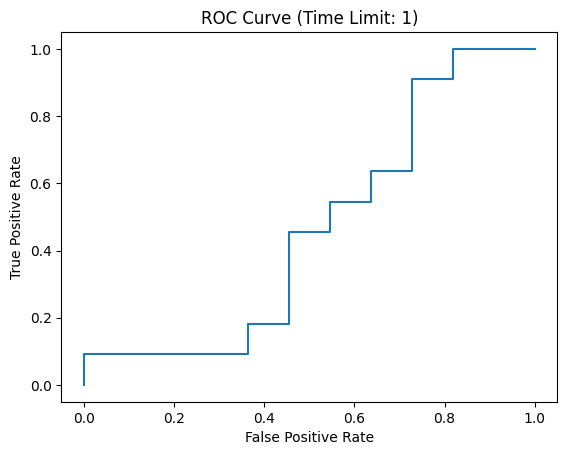

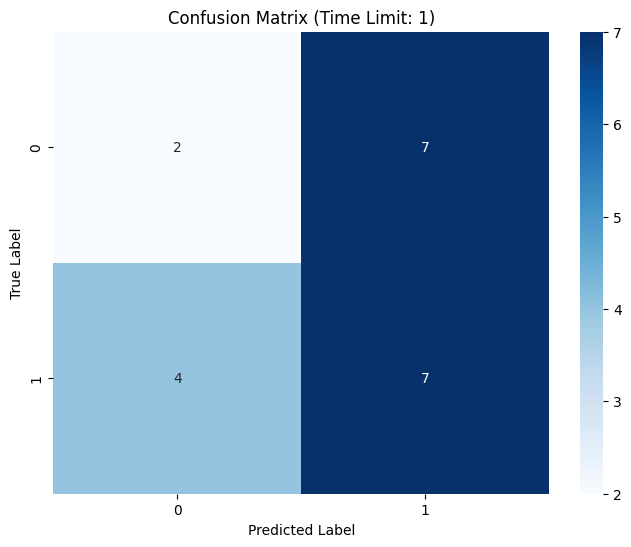

For time limit 2 and NMF features:
SVM Accuracy: 0.5932692307692309
ROC AUC: 0.5345824099160954
Precision: 0.4915211317750017
Recall: 0.21990157764031437
Confusion Matrix:
[[26  4]
 [16  4]]


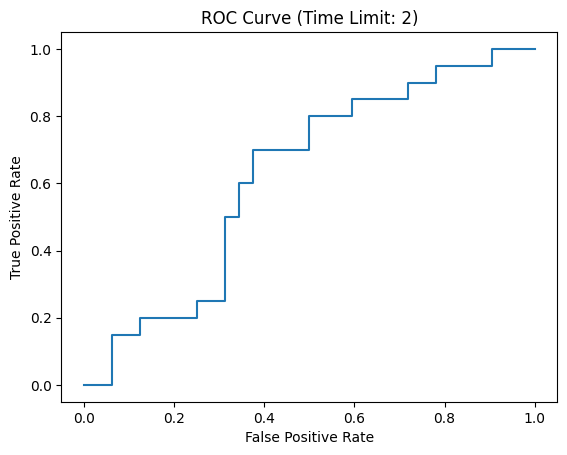

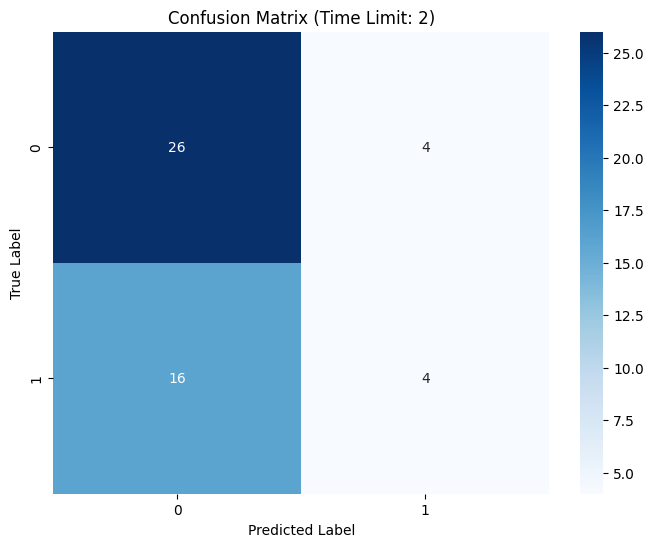

For time limit 4 and NMF features:
SVM Accuracy: 0.6768493150684936
ROC AUC: 0.516983057176047
Precision: 0.5153809523809524
Recall: 0.05996067768184344
Confusion Matrix:
[[48  1]
 [22  1]]


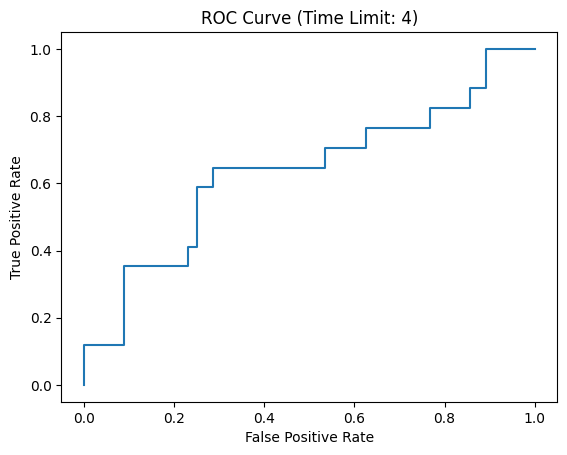

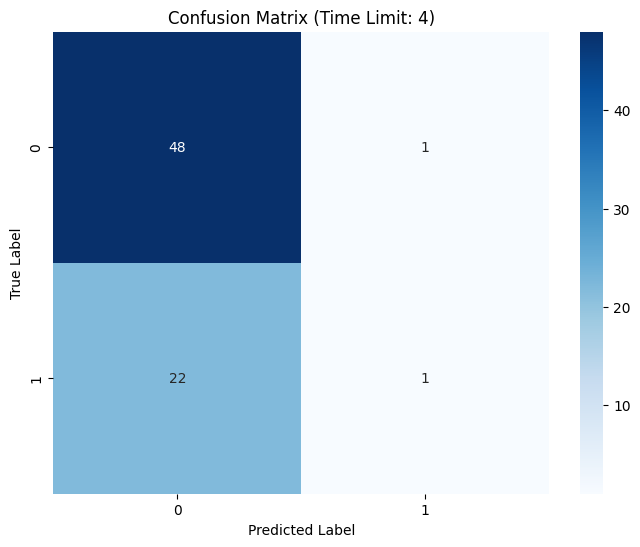

For time limit 5 and NMF features:
SVM Accuracy: 0.67875
ROC AUC: 0.49903366409861855
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[54  0]
 [25  0]]


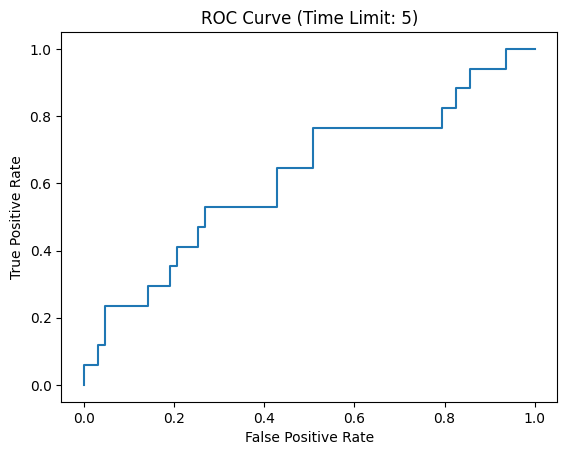

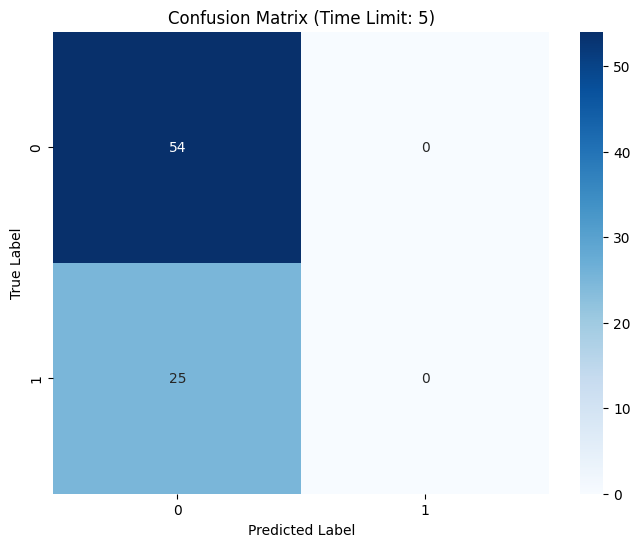

For time limit 6 and NMF features:
SVM Accuracy: 0.6846987951807227
ROC AUC: 0.49949039264828743
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[56  0]
 [26  0]]


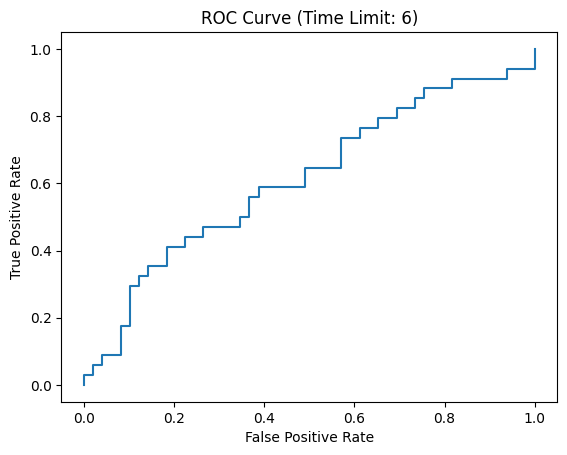

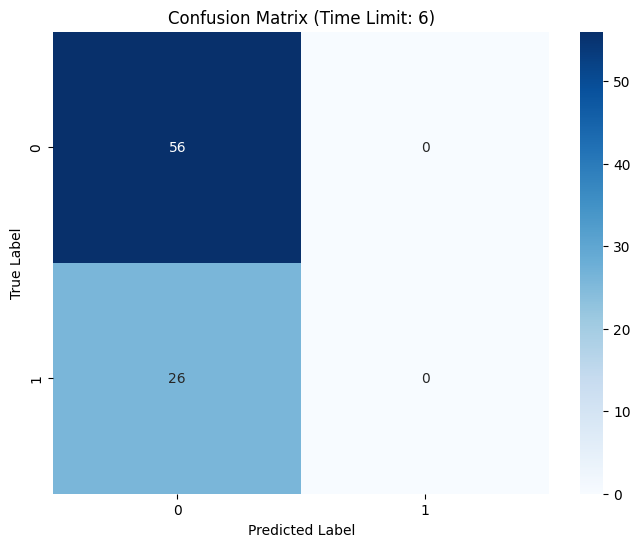

For time limit 8 and NMF features:
SVM Accuracy: 0.6974712643678161
ROC AUC: 0.4985711482279105
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[60  0]
 [26  0]]


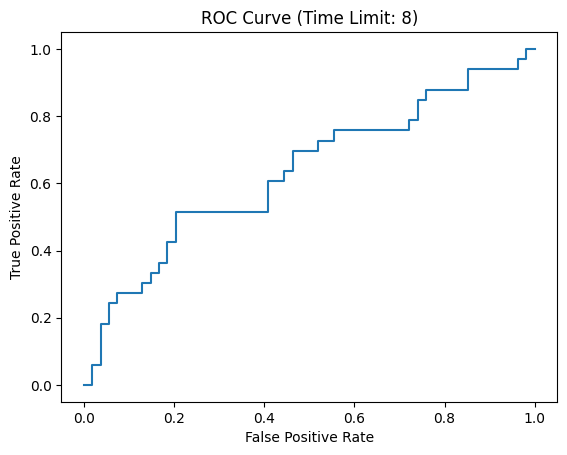

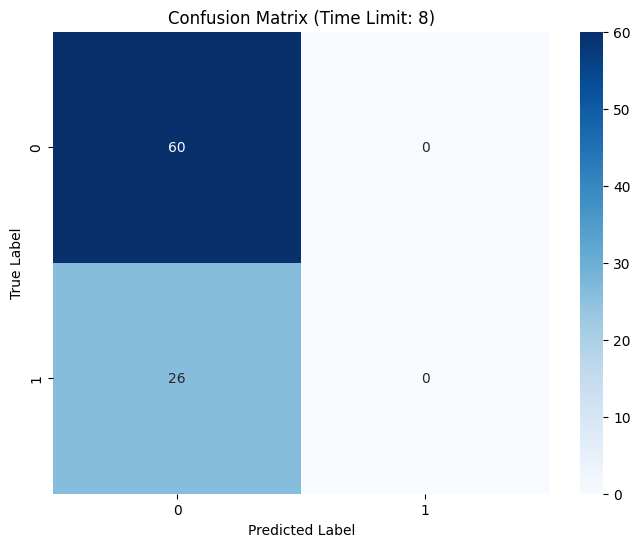

For time limit 10 and NMF features:
SVM Accuracy: 0.7017045454545456
ROC AUC: 0.5
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[61  0]
 [26  0]]


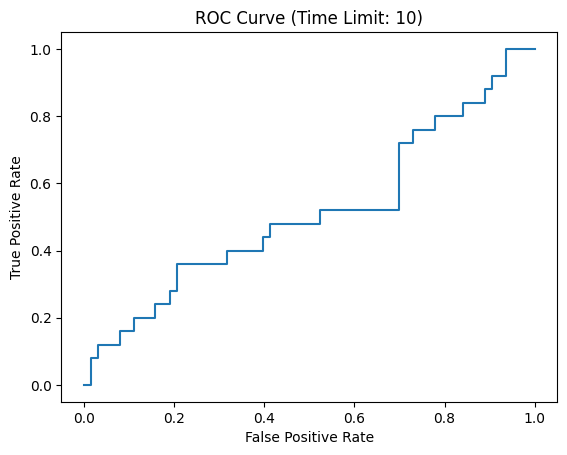

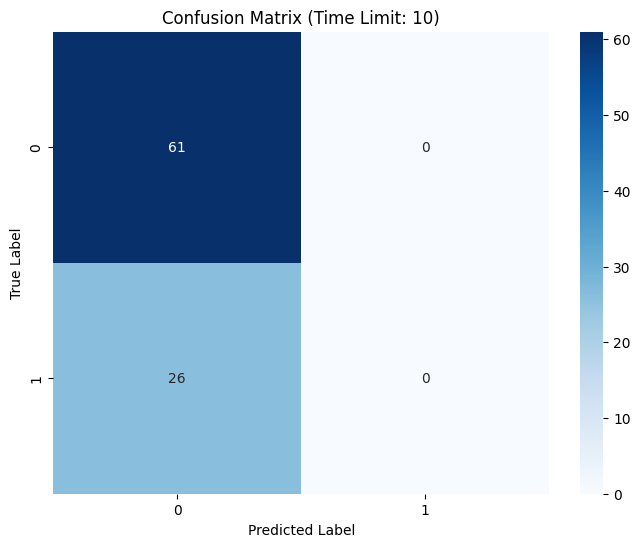

In [32]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Create the SVM classifier object
svm_clf = svm.SVC(kernel='rbf')

def classification_svm_kernel(df):
    # Get features you select
    X = df.drop(columns=['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    svm_clf.fit(X_train, y_train)

    # Predict on the test set
    svm_predictions = svm_clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, svm_predictions)
    roc_auc = roc_auc_score(y_test, svm_predictions)
    precision = precision_score(y_test, svm_predictions)
    recall = recall_score(y_test, svm_predictions)
    confusion = confusion_matrix(y_test, svm_predictions)

    return accuracy, roc_auc, precision, recall, confusion, X_test, y_test
# Define the time limits
time_limits = [1,2,4,5,6,8, 10]

# Perform classification and compute ROC AUC for each time limit
for time_limit in time_limits:
    data = full_data[full_data['DSS.time'] <= time_limit].reset_index(drop=True)
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns=['component_1', 'component_2', 'component_3','component_4','component_5','component_6'])
    df_reduced['DSS'] = data['DSS']
    df_reduced['DSS.time'] = data['DSS.time']
    accuracy_list = []
    roc_auc_list = []
    precision_list = []
    recall_list = []
    confusion_list = []
    X_test_final = None
    y_test_final = None
    for _ in range(100):
        accuracy, roc_auc, precision, recall, confusion, X_test, y_test = classification_svm_kernel(df_reduced)
        accuracy_list.append(accuracy)
        roc_auc_list.append(roc_auc)
        precision_list.append(precision)
        recall_list.append(recall)
        confusion_list.append(confusion)
        if X_test_final is None:
            X_test_final = X_test
            y_test_final = y_test
    
    mean_accuracy = sum(accuracy_list) / len(accuracy_list)
    mean_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
    mean_precision = sum(precision_list) / len(precision_list)
    mean_recall = sum(recall_list) / len(recall_list)
    mean_confusion = np.array(confusion_list).mean(axis=0).astype(int)

    print(f'For time limit {time_limit} and NMF features:')
    print(f'SVM Accuracy: {mean_accuracy}')
    print(f'ROC AUC: {mean_roc_auc}')
    print(f'Precision: {mean_precision}')
    print(f'Recall: {mean_recall}')
    print(f'Confusion Matrix:')
    print(mean_confusion)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_final, svm_clf.decision_function(X_test_final))
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Time Limit: {time_limit})')
    plt.show()

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(mean_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix (Time Limit: {time_limit})')
    plt.show()

Poly degree 

In [16]:
def classifcation_svm_poly(df):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # SVM
   
    # Define the model
    svm_clf = svm.SVC(kernel='poly',degree=4)

    # Train the model
    svm_clf.fit(X_train, y_train)
   
    # Predict on the test set
    svm_predictions = svm_clf.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, svm_predictions)
    #print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

In [17]:
for i in time_limit:
    data = full_data[full_data['DSS.time'] <= i]
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
    df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
    lis = []
    for k in range(100):
        accuracy = classifcation_svm_poly(df_reduced)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    print('For time limit ' + str(i) + ' and nmf features')
    print('SVM poly accuracy ' + str(mean_acc))

For time limit 1 and nmf features
SVM poly accuracy 0.7240909090909088
For time limit 2 and nmf features
SVM poly accuracy 0.7034615384615379
For time limit 3 and nmf features
SVM poly accuracy 0.6703030303030301
For time limit 4 and nmf features
SVM poly accuracy 0.695342465753425
For time limit 5 and nmf features
SVM poly accuracy 0.709625
For time limit 6 and nmf features
SVM poly accuracy 0.7098795180722891
For time limit 7 and nmf features
SVM poly accuracy 0.6994117647058821
For time limit 8 and nmf features
SVM poly accuracy 0.7179310344827587
For time limit 9 and nmf features
SVM poly accuracy 0.7048863636363639
For time limit 10 and nmf features
SVM poly accuracy 0.7163636363636365


For time limit 1 and NMF features:
SVM Accuracy: 0.4613636363636362
ROC AUC: 0.521338406691348
Precision: 0.5423593073593073
Recall: 0.39057508178096406
Confusion Matrix:
[[6 4]
 [7 4]]


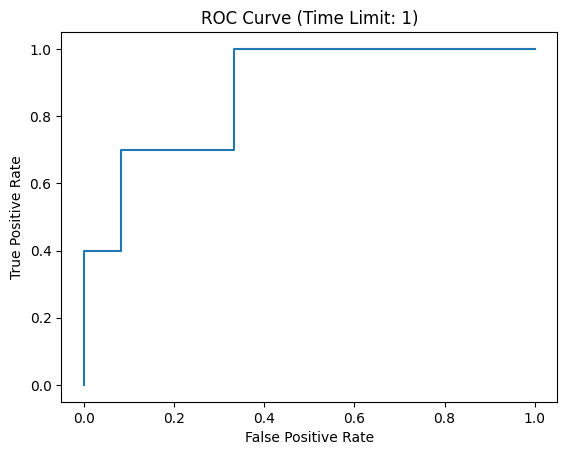

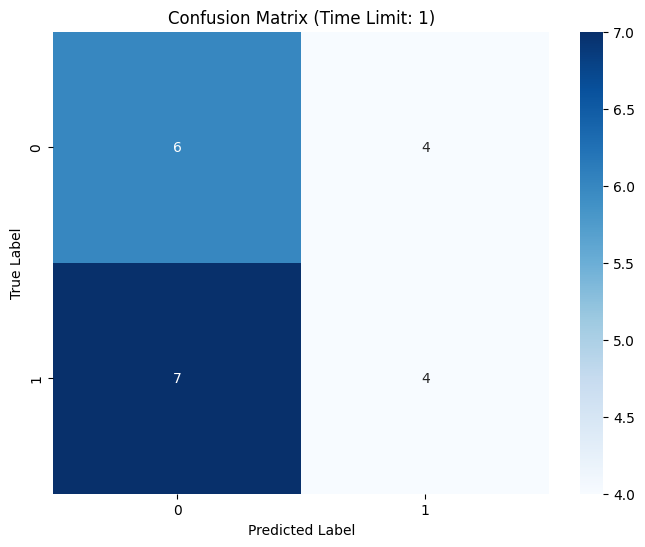

For time limit 2 and NMF features:
SVM Accuracy: 0.5815384615384614
ROC AUC: 0.5068696645991435
Precision: 0.39299999999999996
Recall: 0.030907091454658423
Confusion Matrix:
[[29  0]
 [21  0]]


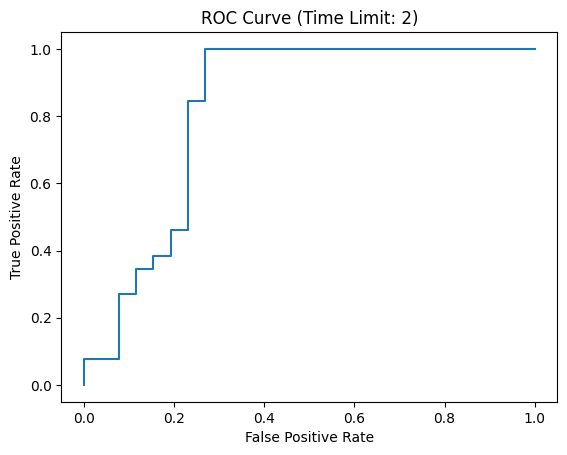

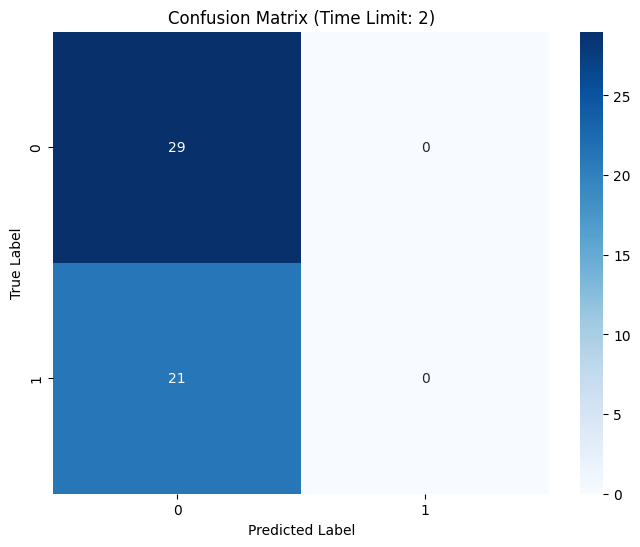

For time limit 4 and NMF features:
SVM Accuracy: 0.6646575342465758
ROC AUC: 0.49997588936008747
Precision: 0.135
Recall: 0.009431057991438096
Confusion Matrix:
[[48  0]
 [24  0]]


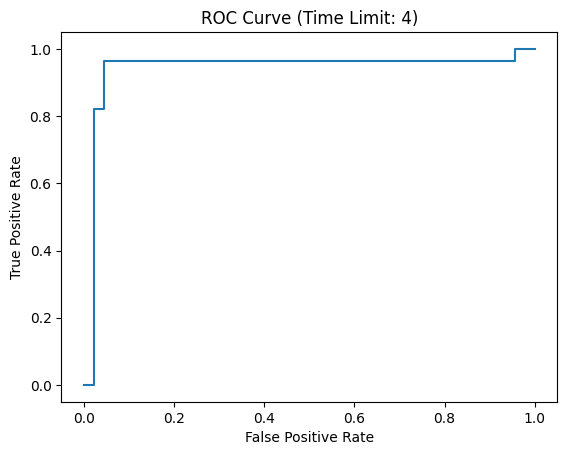

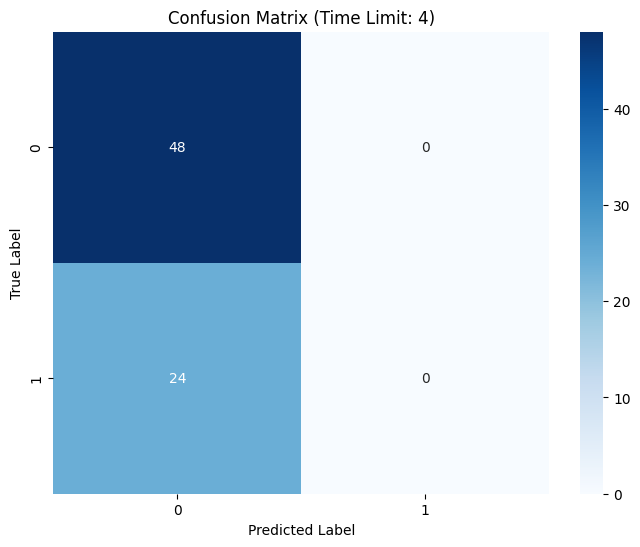

For time limit 5 and NMF features:
SVM Accuracy: 0.6797500000000002
ROC AUC: 0.502905873129249
Precision: 0.21933333333333338
Recall: 0.012478634927826164
Confusion Matrix:
[[54  0]
 [25  0]]


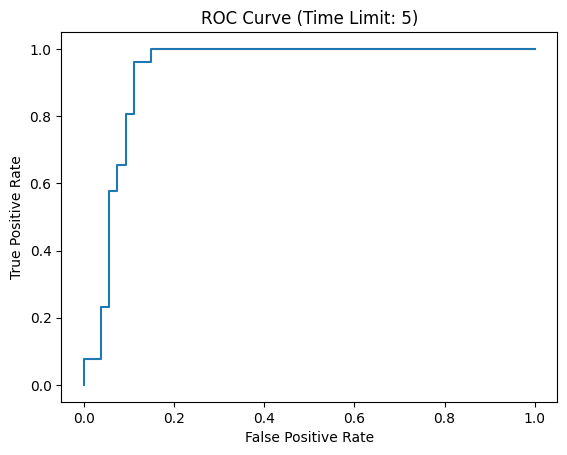

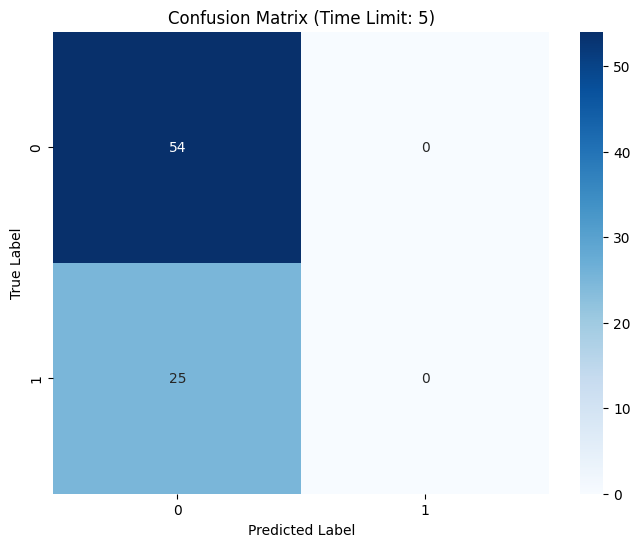

For time limit 6 and NMF features:
SVM Accuracy: 0.7020481927710843
ROC AUC: 0.5139945993999631
Precision: 0.4626666666666667
Recall: 0.036207906070872944
Confusion Matrix:
[[57  0]
 [24  0]]


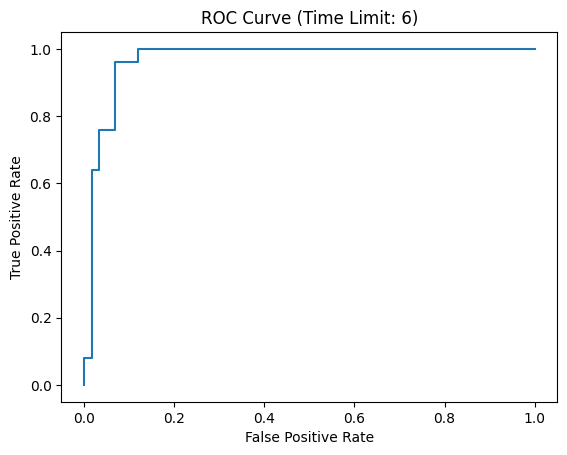

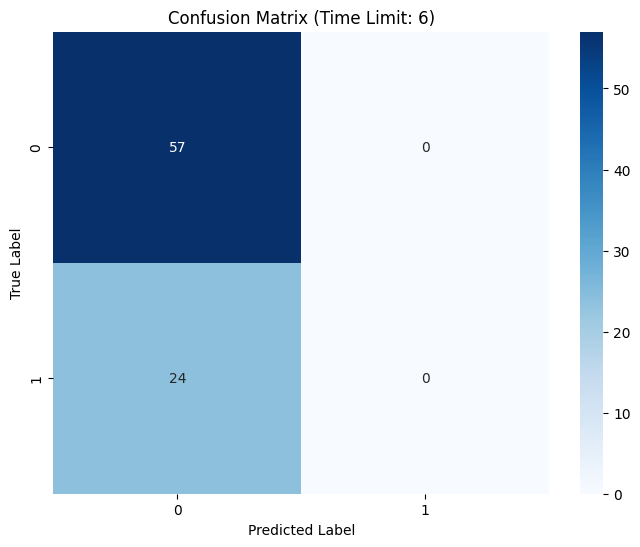

For time limit 8 and NMF features:
SVM Accuracy: 0.692298850574713
ROC AUC: 0.5009566631432859
Precision: 0.25966666666666666
Recall: 0.016147446646766154
Confusion Matrix:
[[59  0]
 [25  0]]


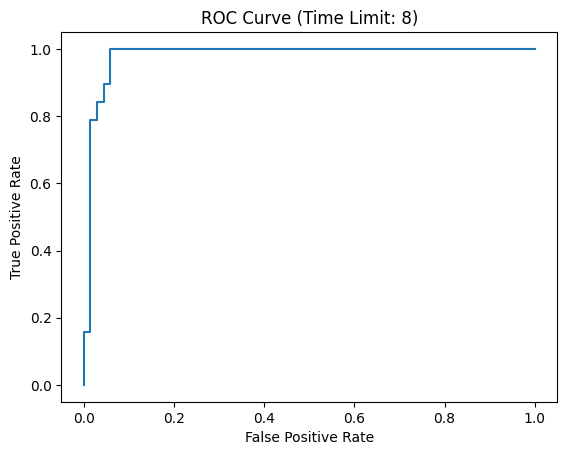

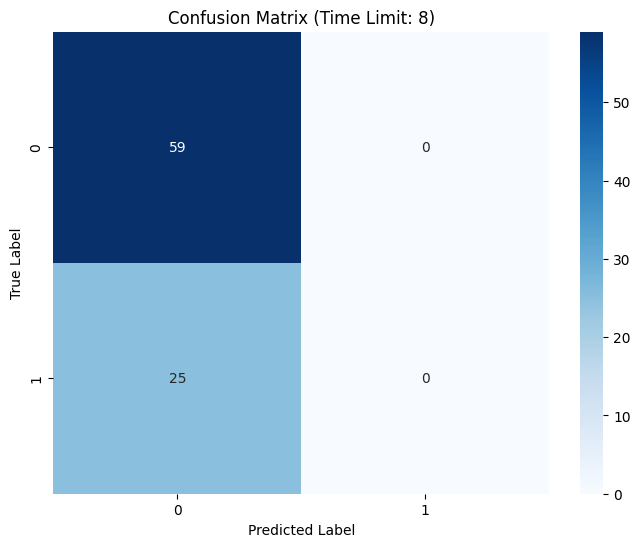

For time limit 7 and NMF features:
SVM Accuracy: 0.7010588235294118
ROC AUC: 0.5120396012095784
Precision: 0.4855
Recall: 0.030293240594861954
Confusion Matrix:
[[58  0]
 [25  0]]


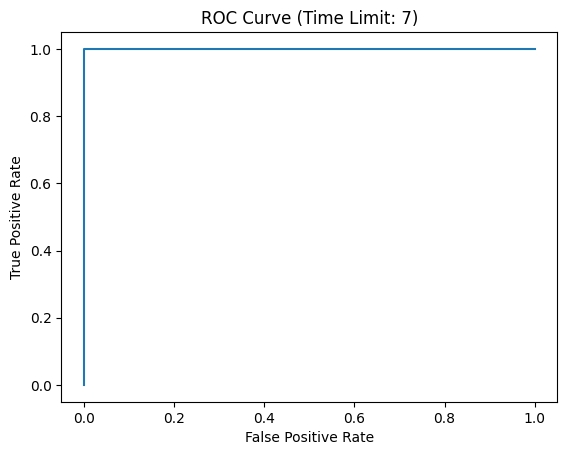

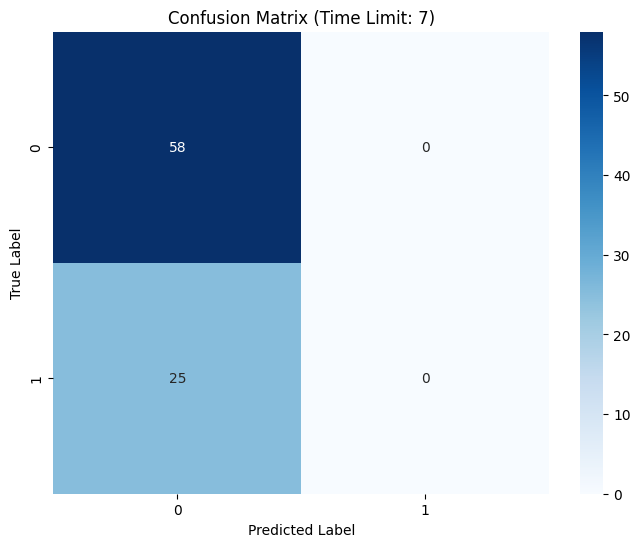

For time limit 10 and NMF features:
SVM Accuracy: 0.6977272727272725
ROC AUC: 0.500023394498389
Precision: 0.25199999999999995
Recall: 0.01998814004950978
Confusion Matrix:
[[60  1]
 [25  0]]


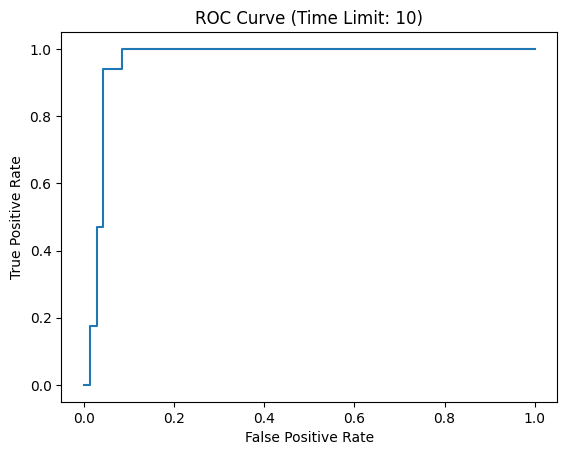

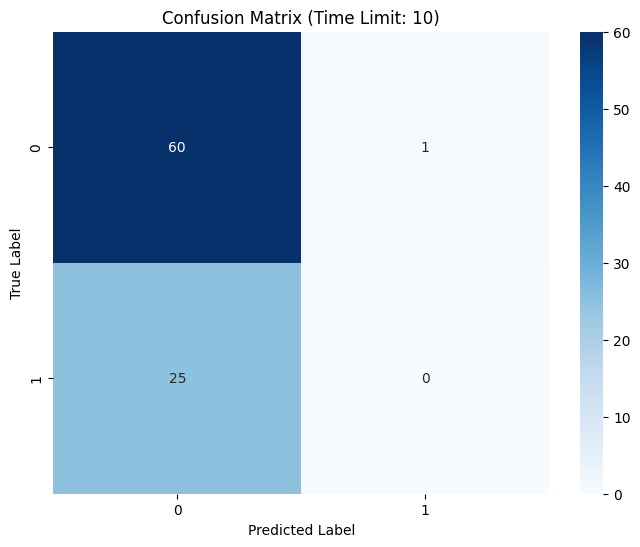

In [44]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Create the SVM classifier object
svm_clf = svm.SVC(kernel='poly')

def classification_svm_kernel(df,y):
    # Get features you select
    #X = df.drop(columns=['DSS.time', 'DSS'])
    #y = df['DSS']
    X=df
    y=y
    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    svm_clf.fit(X_train, y_train)

    # Predict on the test set
    svm_predictions = svm_clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, svm_predictions)
    roc_auc = roc_auc_score(y_test, svm_predictions)
    precision = precision_score(y_test, svm_predictions)
    recall = recall_score(y_test, svm_predictions)
    confusion = confusion_matrix(y_test, svm_predictions)

    return accuracy, roc_auc, precision, recall, confusion, X_test, y_test
# Define the time limits
time_limits = [1,2,4,5,6,8, 7,10]

# Perform classification and compute ROC AUC for each time limit
for time_limit in time_limits:
    full_data=full_data[['gender', 'ajcc_pathologic_tumor_stage','DSS','DSS.time' ,'tumor_status','TP53',	'TTN',	'FAT1',	'MUC16','CLCA4','EGFR','Missense_Mutation',	'Nonsense_Mutation',	'Nonstop_Mutation',	'Splice_Site',	'age']]  # Replace with the actual feature columns
    data = full_data[full_data['DSS.time'] <= time_limit].reset_index(drop=True)
    X_reduced=data.drop(columns=['DSS.time', 'DSS'])
    y= data['DSS']
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns=['component_1', 'component_2', 'component_3','component_4','component_5','component_6'])
    df_reduced['DSS'] = data['DSS']
    df_reduced['DSS.time'] = data['DSS.time']
    accuracy_list = []
    roc_auc_list = []
    precision_list = []
    recall_list = []
    confusion_list = []
    X_test_final = None
    y_test_final = None
    for _ in range(100):
        accuracy, roc_auc, precision, recall, confusion, X_test, y_test = classification_svm_kernel(df_reduced,y)
        accuracy_list.append(accuracy)
        roc_auc_list.append(roc_auc)
        precision_list.append(precision)
        recall_list.append(recall)
        confusion_list.append(confusion)
        if X_test_final is None:
            X_test_final = X_test
            y_test_final = y_test
    
    mean_accuracy = sum(accuracy_list) / len(accuracy_list)
    mean_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
    mean_precision = sum(precision_list) / len(precision_list)
    mean_recall = sum(recall_list) / len(recall_list)
    mean_confusion = np.array(confusion_list).mean(axis=0).astype(int)

    print(f'For time limit {time_limit} and NMF features:')
    print(f'SVM Accuracy: {mean_accuracy}')
    print(f'ROC AUC: {mean_roc_auc}')
    print(f'Precision: {mean_precision}')
    print(f'Recall: {mean_recall}')
    print(f'Confusion Matrix:')
    print(mean_confusion)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_final, svm_clf.decision_function(X_test_final))
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Time Limit: {time_limit})')
    plt.show()

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(mean_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix (Time Limit: {time_limit})')
    plt.show()

Best poly degree of freedom: 3

In [18]:
def classifcation_svm_poly(df):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # SVM
   
    # Define the model
    svm_clf = svm.SVC(kernel='poly',class_weight='balanced')

    # Train the model
    svm_clf.fit(X_train, y_train)
   
    # Predict on the test set
    svm_predictions = svm_clf.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, svm_predictions)
    #print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

In [19]:
for i in time_limit:
    data = full_data[full_data['DSS.time'] <= i]
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
    df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
    lis = []
    for k in range(100):
        accuracy = classifcation_svm_poly(df_reduced)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    print('For time limit ' + str(i) + ' and nmf features')
    print('SVM poly accuracy ' + str(mean_acc))

For time limit 1 and nmf features
SVM poly accuracy 0.6940909090909091
For time limit 2 and nmf features
SVM poly accuracy 0.37942307692307686
For time limit 3 and nmf features
SVM poly accuracy 0.34151515151515155
For time limit 4 and nmf features
SVM poly accuracy 0.4043835616438355
For time limit 5 and nmf features
SVM poly accuracy 0.701125
For time limit 6 and nmf features
SVM poly accuracy 0.6984337349397588
For time limit 7 and nmf features
SVM poly accuracy 0.6924705882352938
For time limit 8 and nmf features
SVM poly accuracy 0.6633333333333339
For time limit 9 and nmf features
SVM poly accuracy 0.6838636363636362
For time limit 10 and nmf features
SVM poly accuracy 0.6870454545454546


class_weight[i]*C i.e. dict(default) is better.

Cross Validation to find optimal parameters

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
X = df_reduced.drop(columns = ['DSS.time', 'DSS'])
y = df_reduced['DSS']
# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf','poly']
}

# Create the SVM classifier
svm_classifier = SVC()

# Perform grid search cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)  

# Print the best parameters and best mean accuracy
print("Best parameters:", grid_search.best_params_)
print("Best mean accuracy:", grid_search.best_score_)


Code to find predictive value of each feature

In [11]:
def classifcation_svm_poly_see(df,output_file,i):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # SVM
   
    accuracies = {}  # Dictionary to store accuracies for each feature column

    # Iterate over each feature column
    for col in X.columns:
        # SVM
        # Define the model
        svm_clf = svm.SVC(kernel='poly', class_weight='balanced')

        # Train the model
        svm_clf.fit(X_train[[col]], y_train)

        # Predict on the test set
        svm_predictions = svm_clf.predict(X_test[[col]])

        # Evaluate the model
        accuracy = accuracy_score(y_test, svm_predictions)
        accuracies[col] = accuracy
        if accuracy > 0.7:
            print("Column:", col)
            print("Accuracy:", accuracy)
            print()
            for col, accuracy in accuracies.items():
                f.write(f"time: {i}\n")
                f.write(f"Column: {col}\n")
                f.write(f"Accuracy: {accuracy}\n\n")
    return accuracies

In [18]:
#for i=2:
i=10

data = full_data[full_data['DSS.time'] <= i]
lis = []
output_file ='accuracy10.txt'
with open(output_file, 'a') as f:
    for k in range(100):
        accuracy = classifcation_svm_poly_see(data,output_file,i)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
print('For time limit ' + str(i) + ' and nmf features')
print('SVM poly accuracy ' + str(mean_acc))

Column: tumor_status
Accuracy: 0.9545454545454546

Column: AHNAK
Accuracy: 0.7045454545454546

Column: tumor_status
Accuracy: 0.9318181818181818

Column: tumor_status
Accuracy: 0.9090909090909091

Column: tumor_status
Accuracy: 0.9318181818181818

Column: PIK3CA
Accuracy: 0.7045454545454546

Column: EP300
Accuracy: 0.7045454545454546

Column: NIPBL
Accuracy: 0.7045454545454546

Column: Nonstop_Mutation
Accuracy: 0.7045454545454546

Column: tumor_status
Accuracy: 0.8977272727272727

Column: PIK3CA
Accuracy: 0.7159090909090909

Column: THSD7A
Accuracy: 0.7045454545454546

Column: ZNF208
Accuracy: 0.7045454545454546

Column: NIPBL
Accuracy: 0.7045454545454546

Column: CEACAM5
Accuracy: 0.7159090909090909

Column: Nonstop_Mutation
Accuracy: 0.7045454545454546

Column: tumor_status
Accuracy: 0.9318181818181818

Column: FAT1
Accuracy: 0.7159090909090909

Column: MUC16
Accuracy: 0.7159090909090909

Column: LRP1B
Accuracy: 0.7159090909090909

Column: PIK3CA
Accuracy: 0.7272727272727273

Column

TypeError: unsupported operand type(s) for +: 'int' and 'dict'

In [7]:
def classifcation_svm_poly(df):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # SVM
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in skf.split(X, y):
   
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # SVM
        svm_clf = svm.SVC(kernel='poly')
        svm_clf.fit(X_train, y_train)
        svm_predictions = svm_clf.predict(X_test)

        accuracy = accuracy_score(y_test, svm_predictions)
        lis.append(accuracy)

        # Evaluate the model
    return accuracy_score(y_test, svm_predictions)
    #print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

In [9]:
from sklearn.model_selection import StratifiedKFold
for i in time_limit:
    data = full_data[full_data['DSS.time'] <= i]
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
    df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
    lis = []
    for k in range(100):
        accuracy = classifcation_svm_poly(df_reduced)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    print('For time limit ' + str(i) + ' and nmf features')
    print('SVM poly accuracy ' + str(mean_acc))

For time limit 1 and nmf features
SVM poly accuracy 0.7196969696969763
For time limit 2 and nmf features
SVM poly accuracy 0.6948215183509264
For time limit 3 and nmf features
SVM poly accuracy 0.6752136752136735
For time limit 4 and nmf features
SVM poly accuracy 0.7034817351598174
For time limit 5 and nmf features
SVM poly accuracy 0.7170094936708807
For time limit 6 and nmf features
SVM poly accuracy 0.7096679400528899
For time limit 7 and nmf features
SVM poly accuracy 0.710084033613446
For time limit 8 and nmf features
SVM poly accuracy 0.7088122605364063
For time limit 9 and nmf features
SVM poly accuracy 0.71183820968304
For time limit 10 and nmf features
SVM poly accuracy 0.7102272727272669


In [19]:
def classifcation_svm_poly(df):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # SVM
    loo = LeaveOneOut()

    lis = []  # List to store accuracies for each fold
    for train_index, test_index in loo.split(X):
   
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # SVM
        svm_clf = svm.SVC(kernel='poly')
        svm_clf.fit(X_train, y_train)
        svm_predictions = svm_clf.predict(X_test)

        accuracy = accuracy_score(y_test, svm_predictions)
        lis.append(accuracy)

        # Evaluate the model
    return accuracy_score(y_test, svm_predictions)
    #print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
for i in time_limit:
    data = full_data[full_data['DSS.time'] <= i]
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
    df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
    lis = []
    for k in range(100):
        accuracy = classifcation_svm_poly(df_reduced)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    print('For time limit ' + str(i) + ' and nmf features')
    print('SVM poly accuracy ' + str(mean_acc))

For time limit 1 and nmf features
SVM poly accuracy 1.0
For time limit 2 and nmf features
SVM poly accuracy 1.0


In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
i=4
data = full_data[full_data['DSS.time'] <= i]
X_reduced = nmf.fit_transform(data)
df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
lis = []
for k in range(100):
    accuracy = classifcation_svm_poly(df_reduced)
    lis.append(accuracy)
mean_acc = sum(lis)/len(lis)
print('For time limit ' + str(i) + ' and nmf features')
print('SVM poly accuracy ' + str(mean_acc))

KeyboardInterrupt: 

Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the range of number of trees to test
num_trees_range = range(10, 101, 10)
full_data2=full_data[['gender', 'ajcc_pathologic_tumor_stage','DSS','DSS.time' ,'tumor_status','TP53',	'TTN',	'FAT1',	'MUC16','CLCA4','EGFR','Missense_Mutation',	'Nonsense_Mutation',	'Nonstop_Mutation',	'Splice_Site',	'age']]  # Replace with the actual feature columns
#data = full_data2[full_data2['DSS.time'] <= time_limit].reset_index(drop=True)
data=full_data2
X_reduced=data.drop(columns=['DSS.time', 'DSS'])
y= data['DSS']
X_reduced = nmf.fit_transform(data)
df_reduced = pd.DataFrame(X_reduced, columns=['component_1', 'component_2', 'component_3','component_4','component_5','component_6'])

X = df_reduced
y = full_data2['DSS']
# Create an empty list to store the mean accuracy for each number of trees
mean_accuracy = []
# Split the dataset into training and testing datasets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Perform cross-validation for each number of trees
for num_trees in num_trees_range:
    # Create the Random Forest classifier with the current number of trees
    rf_classifier = RandomForestClassifier(n_estimators=num_trees)
    
    # Perform cross-validation and get the accuracy scores
    accuracy_scores = cross_val_score(rf_classifier, X, y, cv=5)  # Replace X and y with your data
    
    # Calculate the mean accuracy and store it in the list
    mean_accuracy.append(np.mean(accuracy_scores))

# Find the optimal number of trees with the highest mean accuracy
optimal_num_trees = num_trees_range[np.argmax(mean_accuracy)]
best_mean_accuracy = np.max(mean_accuracy)

# Print the results
print("Optimal number of trees:", optimal_num_trees)
print("Best mean accuracy:", best_mean_accuracy)


Optimal number of trees: 70
Best mean accuracy: 0.6688888888888889


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the range of number of trees to test
num_trees_range = range(10, 101, 10)
data = full_data[full_data['DSS.time'] <= time_limit].reset_index(drop=True)
X_reduced = nmf.fit_transform(data)
df_reduced = pd.DataFrame(X_reduced, columns=['component_1', 'component_2', 'component_3','component_4','component_5','component_6'])
X = df_reduced.drop(columns = ['DSS.time', 'DSS'])
y = df_reduced['DSS']
# Create an empty list to store the mean accuracy for each number of trees
mean_accuracy = []
# Split the dataset into training and testing datasets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Perform cross-validation for each number of trees
for num_trees in num_trees_range:
    # Create the Random Forest classifier with the current number of trees
    rf_classifier = RandomForestClassifier(n_estimators=num_trees)
    
    # Perform cross-validation and get the accuracy scores
    accuracy_scores = cross_val_score(rf_classifier, X, y, cv=5)  # Replace X and y with your data
    
    # Calculate the mean accuracy and store it in the list
    mean_accuracy.append(np.mean(accuracy_scores))

# Find the optimal number of trees with the highest mean accuracy
optimal_num_trees = num_trees_range[np.argmax(mean_accuracy)]
best_mean_accuracy = np.max(mean_accuracy)

# Print the results
print("Optimal number of trees:", optimal_num_trees)
print("Best mean accuracy:", best_mean_accuracy)

For time limit 1 and NMF features:
RF Accuracy: 1.0
ROC AUC: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[10  0]
 [ 0 11]]


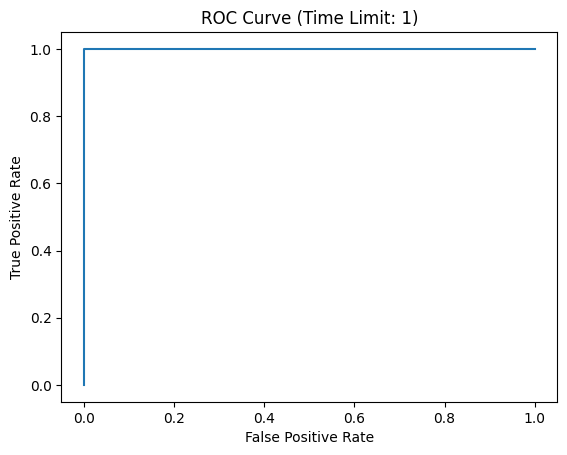

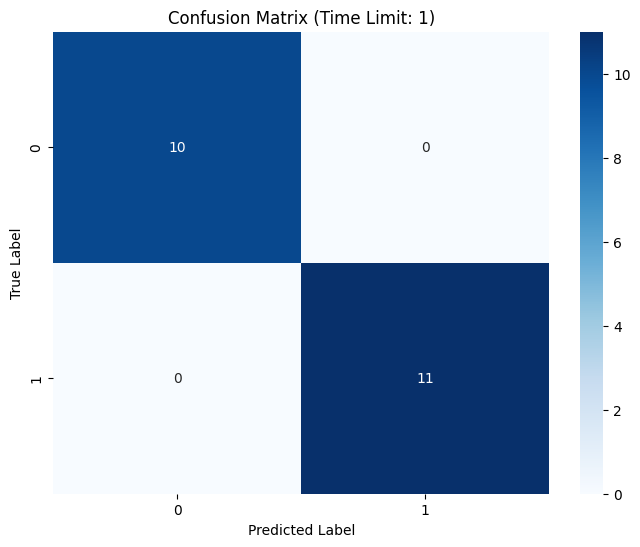

For time limit 2 and NMF features:
RF Accuracy: 1.0
ROC AUC: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[29  0]
 [ 0 22]]


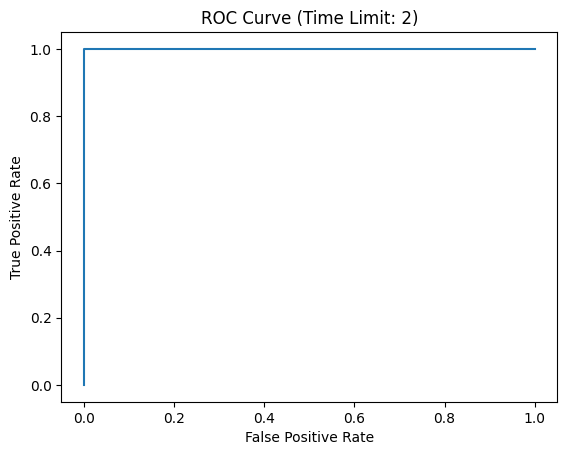

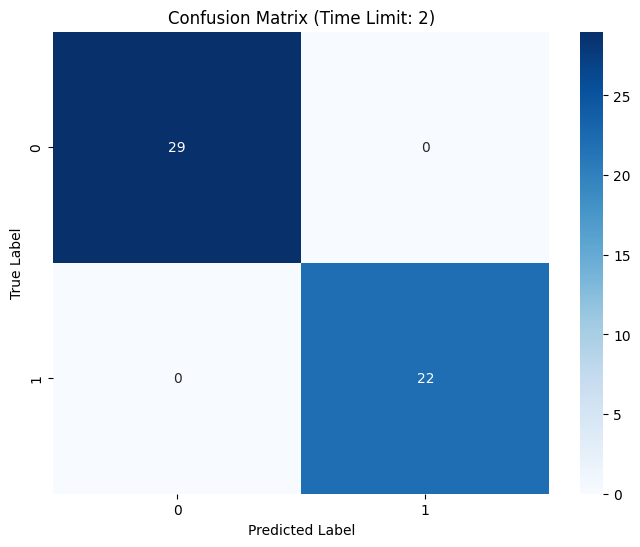

For time limit 4 and NMF features:
RF Accuracy: 1.0
ROC AUC: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[48  0]
 [ 0 24]]


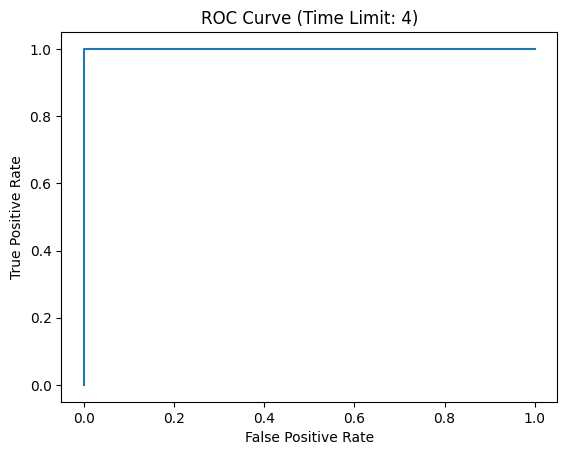

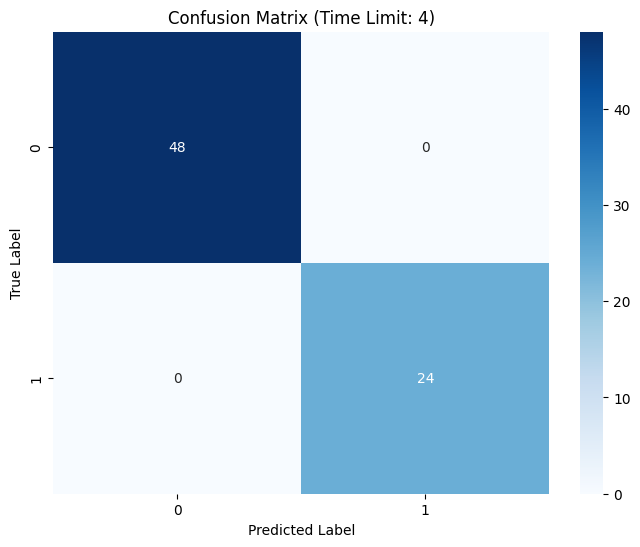

For time limit 5 and NMF features:
RF Accuracy: 1.0
ROC AUC: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[54  0]
 [ 0 25]]


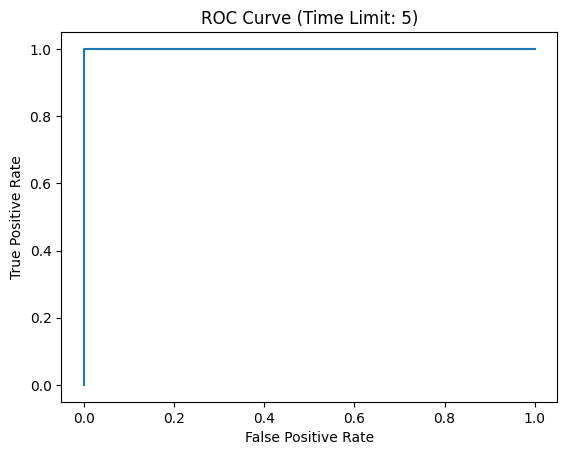

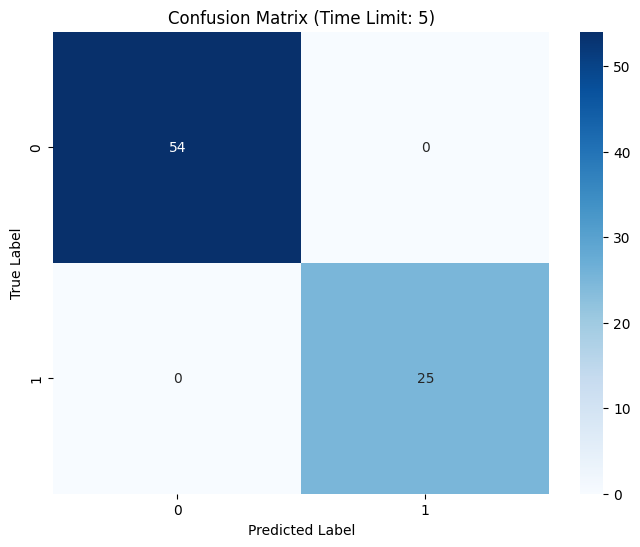

For time limit 6 and NMF features:
RF Accuracy: 1.0
ROC AUC: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[57  0]
 [ 0 25]]


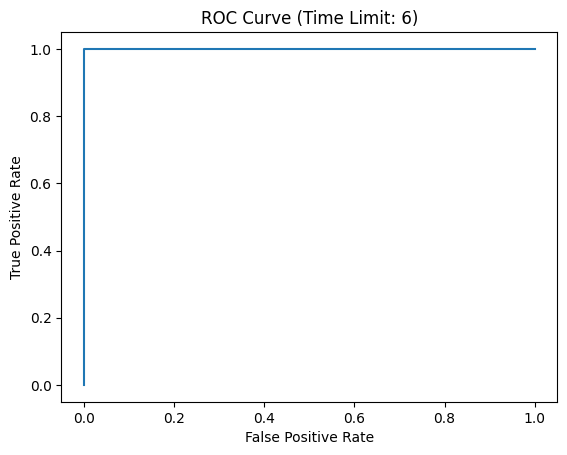

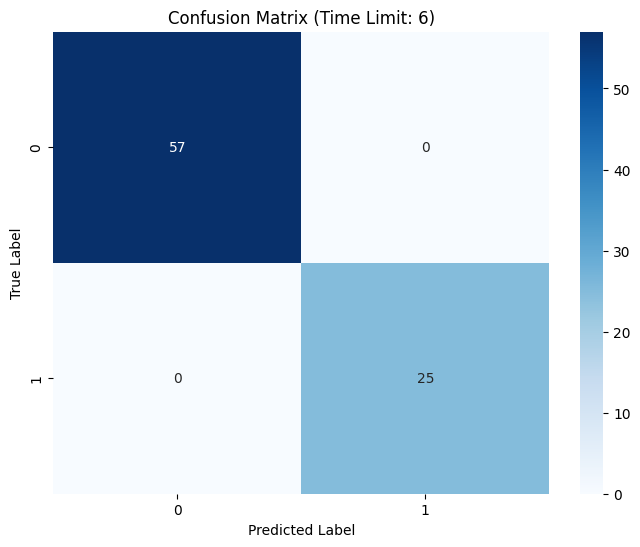

For time limit 8 and NMF features:
RF Accuracy: 1.0
ROC AUC: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[61  0]
 [ 0 25]]


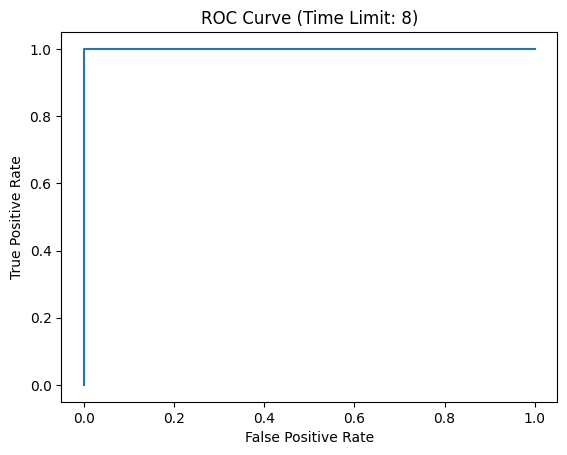

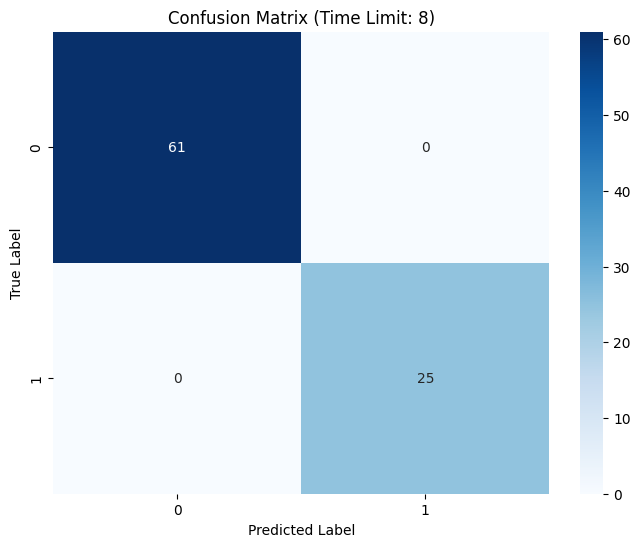

For time limit 7 and NMF features:
RF Accuracy: 1.0
ROC AUC: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[58  0]
 [ 0 26]]


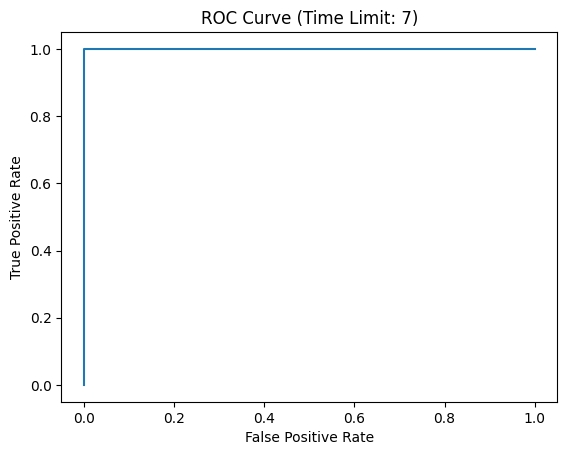

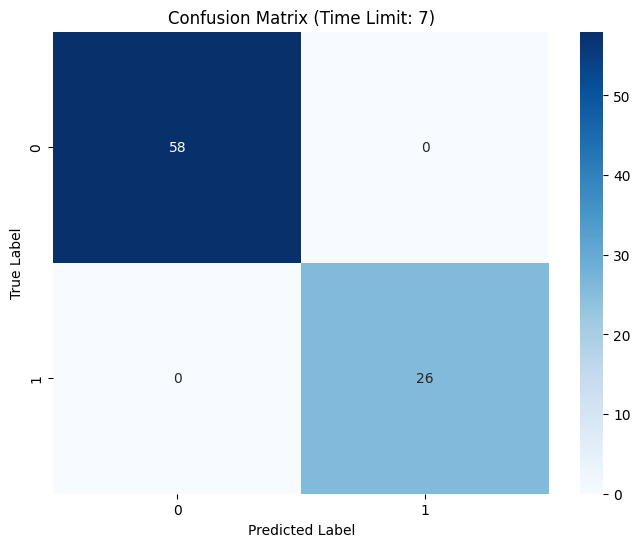

For time limit 10 and NMF features:
RF Accuracy: 1.0
ROC AUC: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[61  0]
 [ 0 26]]


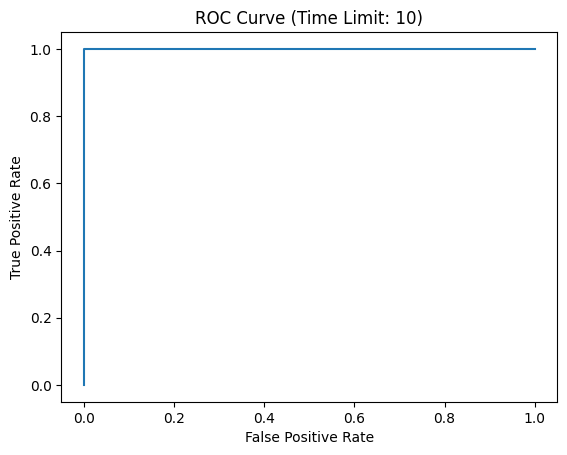

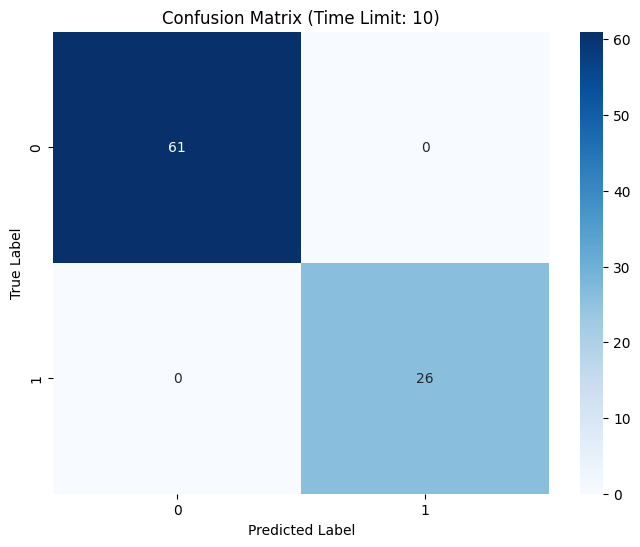

In [11]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Create the RAndom forest classifier object

rf_clf = RandomForestClassifier()

def classification_rf(df,y):
    # Get features you select
    #X = df.drop(columns=['DSS.time', 'DSS'])
    #y = df['DSS']
    X=df
    y=y
    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    rf_clf.fit(X_train, y_train)

    # Predict on the test set
    rf_predictions = rf_clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, rf_predictions)
    roc_auc = roc_auc_score(y_test, rf_predictions)
    precision = precision_score(y_test, rf_predictions)
    recall = recall_score(y_test, rf_predictions)
    confusion = confusion_matrix(y_test, rf_predictions)

    return accuracy, roc_auc, precision, recall, confusion, X_test, y_test
# Define the time limits
time_limits = [1,2,4,5,6,8, 7,10]

# Perform classification and compute ROC AUC for each time limit
for time_limit in time_limits:
    full_data=full_data[['gender', 'ajcc_pathologic_tumor_stage','DSS','DSS.time' ,'tumor_status','TP53',	'TTN',	'FAT1',	'MUC16','CLCA4','EGFR','Missense_Mutation',	'Nonsense_Mutation',	'Nonstop_Mutation',	'Splice_Site',	'age']]  # Replace with the actual feature columns
    data = full_data[full_data['DSS.time'] <= time_limit].reset_index(drop=True)
    X_reduced=data.drop(columns=['DSS.time', 'DSS'])
    y= data['DSS']
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns=['component_1', 'component_2', 'component_3','component_4','component_5','component_6'])
    df_reduced['DSS'] = data['DSS']
    df_reduced['DSS.time'] = data['DSS.time']
    accuracy_list = []
    roc_auc_list = []
    precision_list = []
    recall_list = []
    confusion_list = []
    X_test_final = None
    y_test_final = None
    for _ in range(100):
        accuracy, roc_auc, precision, recall, confusion, X_test, y_test = classification_rf(df_reduced,y)
        accuracy_list.append(accuracy)
        roc_auc_list.append(roc_auc)
        precision_list.append(precision)
        recall_list.append(recall)
        confusion_list.append(confusion)
        if X_test_final is None:
            X_test_final = X_test
            y_test_final = y_test
    
    mean_accuracy = sum(accuracy_list) / len(accuracy_list)
    mean_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
    mean_precision = sum(precision_list) / len(precision_list)
    mean_recall = sum(recall_list) / len(recall_list)
    mean_confusion = np.array(confusion_list).mean(axis=0).astype(int)

    print(f'For time limit {time_limit} and NMF features:')
    print(f'RF Accuracy: {mean_accuracy}')
    print(f'ROC AUC: {mean_roc_auc}')
    print(f'Precision: {mean_precision}')
    print(f'Recall: {mean_recall}')
    print(f'Confusion Matrix:')
    print(mean_confusion)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_final, rf_clf.predict_proba(X_test_final)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Time Limit: {time_limit})')
    plt.show()

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(mean_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix (Time Limit: {time_limit})')
    plt.show()

Showing why optimal number of trees is necessary

For time limit 1 and NMF features:
RF Accuracy: 0.8863636363636358
ROC AUC: 0.8844390478802243
Precision: 0.8949482796615146
Recall: 0.9014906221229749
Confusion Matrix:
[[ 8  1]
 [ 1 10]]


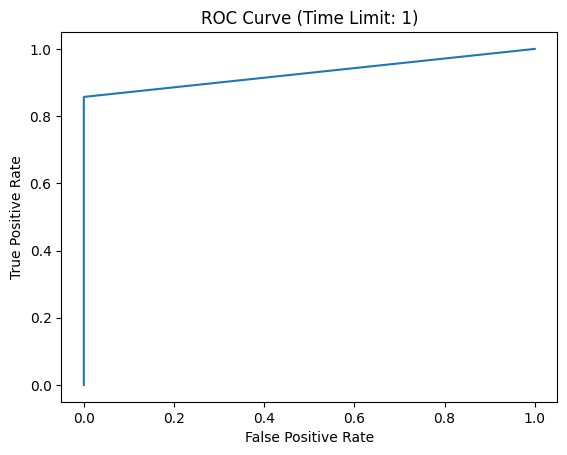

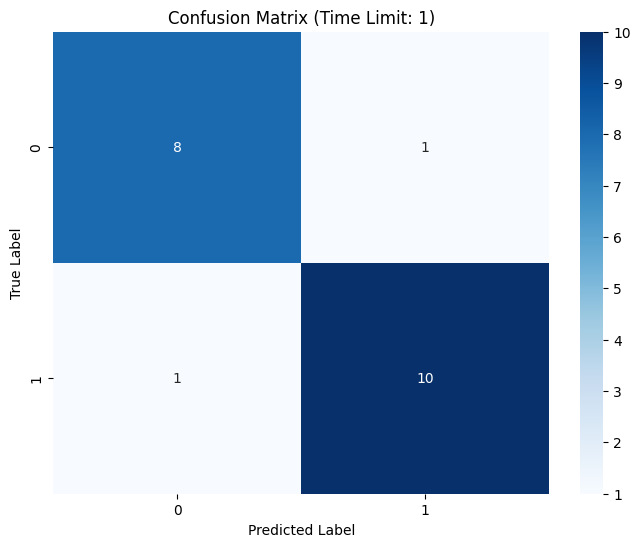

For time limit 2 and NMF features:
RF Accuracy: 0.8971153846153845
ROC AUC: 0.8945640994306052
Precision: 0.8703487966948014
Recall: 0.8849941657102128
Confusion Matrix:
[[28  2]
 [ 2 18]]


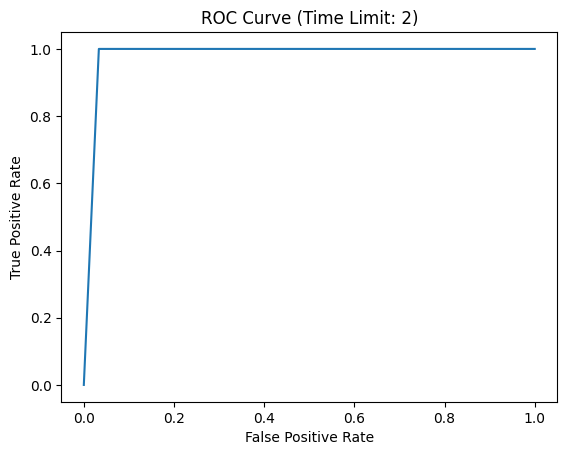

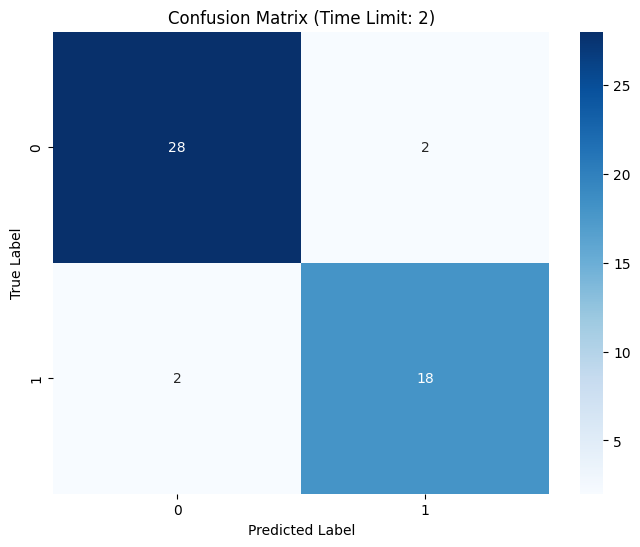

For time limit 4 and NMF features:
RF Accuracy: 0.9241095890410965
ROC AUC: 0.9141742206861823
Precision: 0.8922824771605415
Recall: 0.8835310749255827
Confusion Matrix:
[[45  2]
 [ 2 21]]


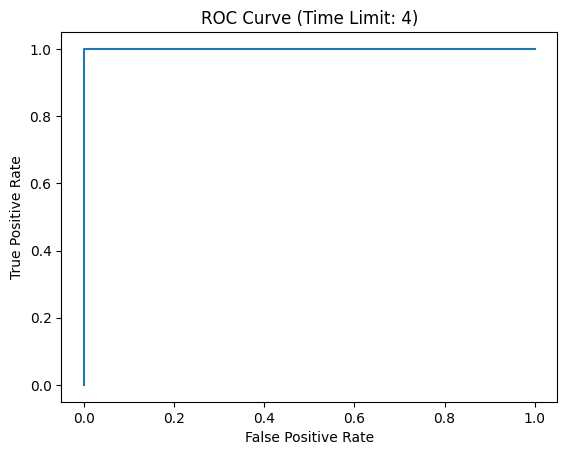

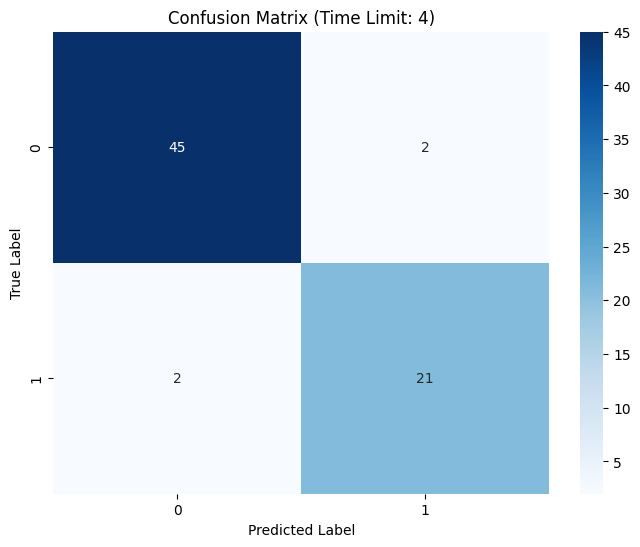

For time limit 5 and NMF features:
RF Accuracy: 0.9473750000000001
ROC AUC: 0.9394248328265222
Precision: 0.9267419005862392
Recall: 0.9148764238279279
Confusion Matrix:
[[52  1]
 [ 2 23]]


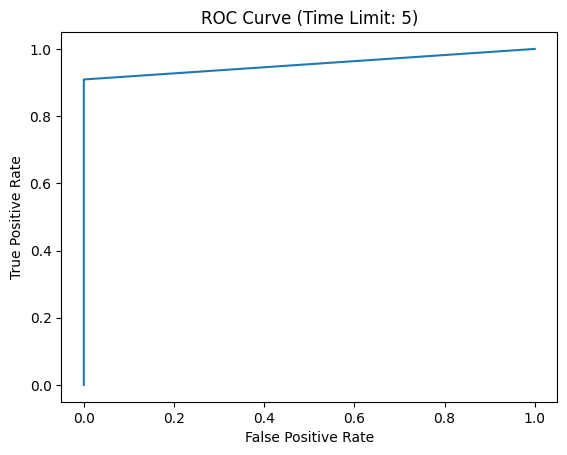

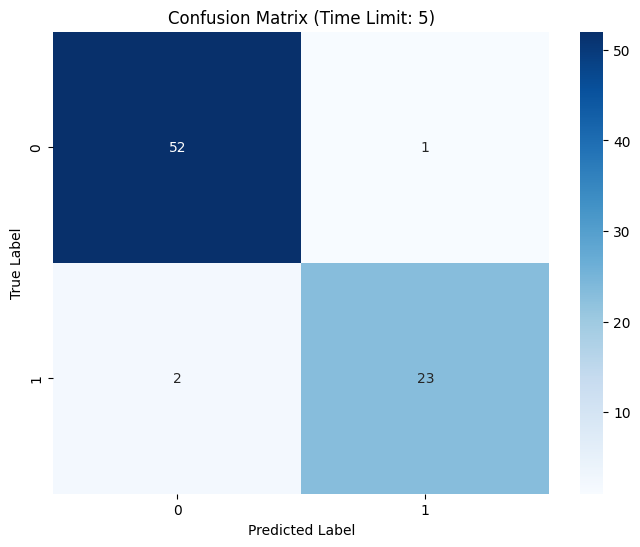

For time limit 6 and NMF features:
RF Accuracy: 0.9279518072289155
ROC AUC: 0.9180858020580166
Precision: 0.889340984938459
Recall: 0.8892275029571474
Confusion Matrix:
[[53  3]
 [ 2 23]]


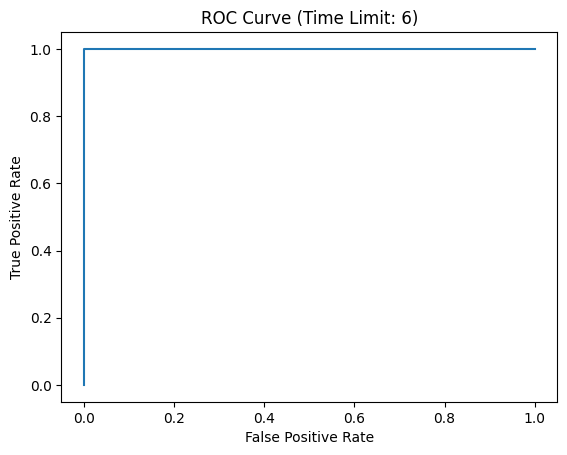

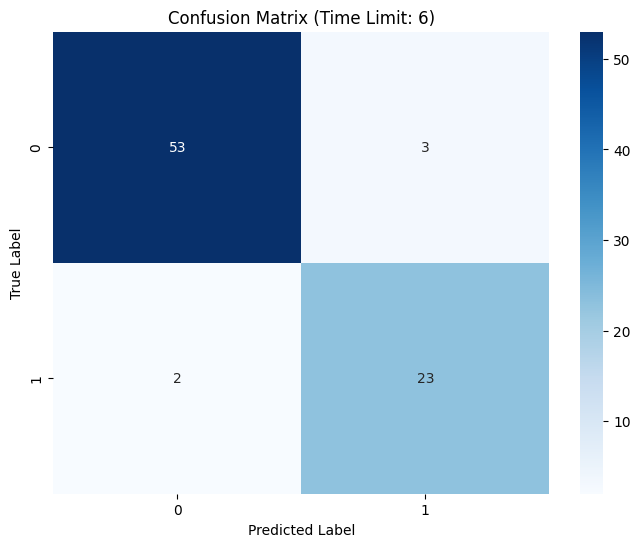

For time limit 8 and NMF features:
RF Accuracy: 0.9425287356321844
ROC AUC: 0.9327572811354921
Precision: 0.9023187050025017
Recall: 0.9089985086987713
Confusion Matrix:
[[58  2]
 [ 2 23]]


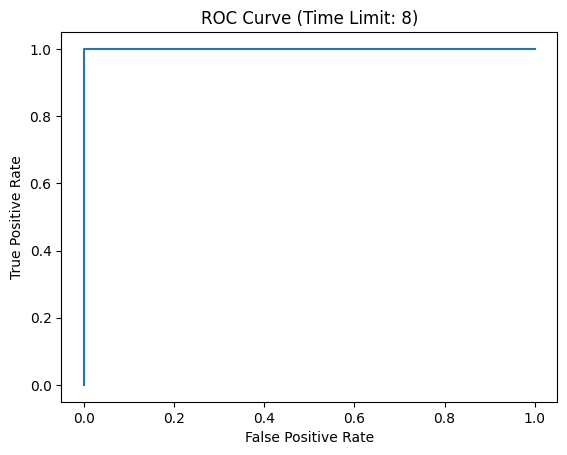

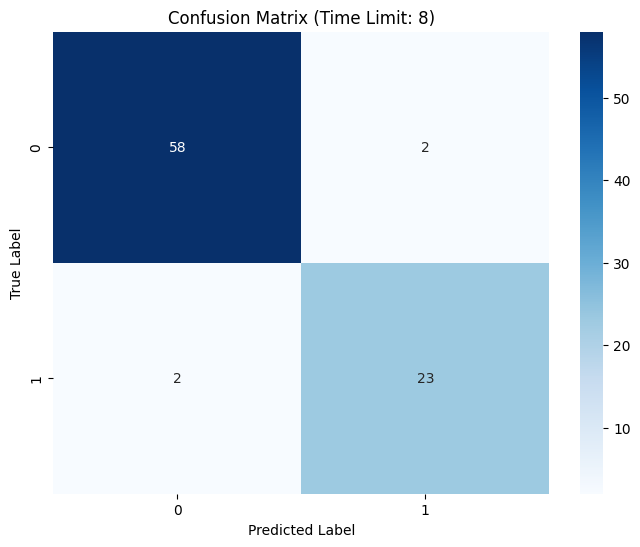

For time limit 7 and NMF features:
RF Accuracy: 0.9519999999999996
ROC AUC: 0.9435344990283042
Precision: 0.9232912283429644
Recall: 0.9209987771675502
Confusion Matrix:
[[57  2]
 [ 2 23]]


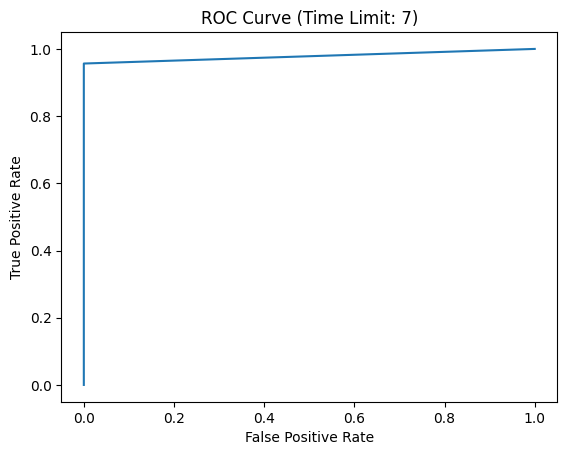

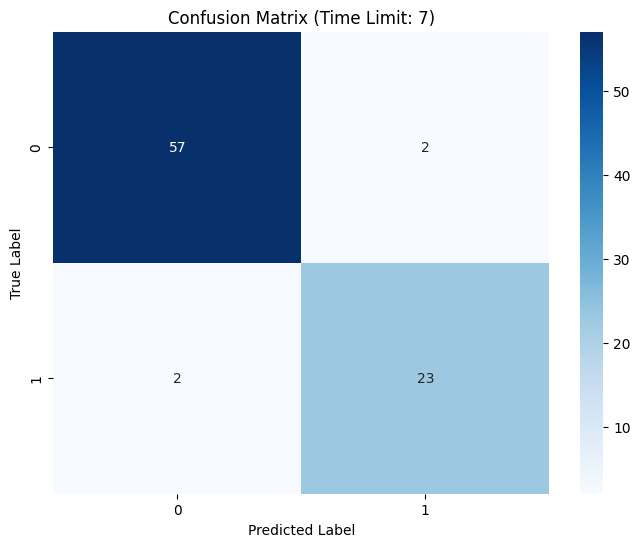

For time limit 10 and NMF features:
RF Accuracy: 0.9498863636363639
ROC AUC: 0.9415489407871661
Precision: 0.9161959784676822
Recall: 0.9204311391787754
Confusion Matrix:
[[59  2]
 [ 2 23]]


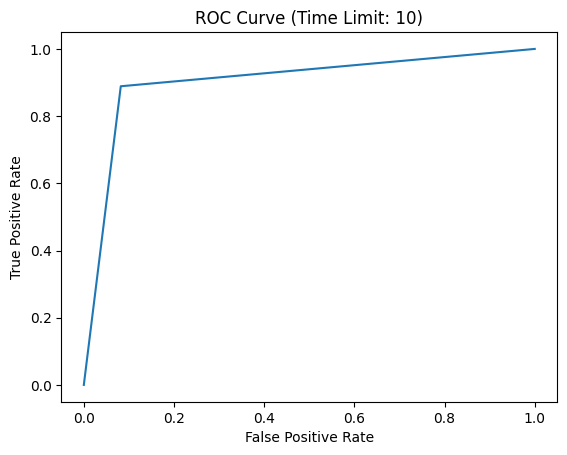

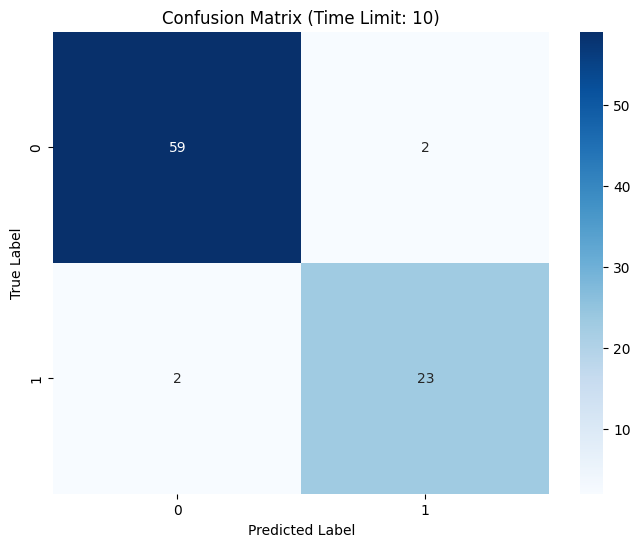

In [14]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Create the RAndom forest classifier object

rf_clf = RandomForestClassifier(n_estimators=1)

def classification_rf(df,y):
    # Get features you select
    #X = df.drop(columns=['DSS.time', 'DSS'])
    #y = df['DSS']
    X=df
    y=y
    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    rf_clf.fit(X_train, y_train)

    # Predict on the test set
    rf_predictions = rf_clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, rf_predictions)
    roc_auc = roc_auc_score(y_test, rf_predictions)
    precision = precision_score(y_test, rf_predictions)
    recall = recall_score(y_test, rf_predictions)
    confusion = confusion_matrix(y_test, rf_predictions)

    return accuracy, roc_auc, precision, recall, confusion, X_test, y_test
# Define the time limits
time_limits = [1,2,4,5,6,8, 7,10]

# Perform classification and compute ROC AUC for each time limit
for time_limit in time_limits:
    full_data=full_data[['gender', 'ajcc_pathologic_tumor_stage','DSS','DSS.time' ,'tumor_status','TP53',	'TTN',	'FAT1',	'MUC16','CLCA4','EGFR','Missense_Mutation',	'Nonsense_Mutation',	'Nonstop_Mutation',	'Splice_Site',	'age']]  # Replace with the actual feature columns
    data = full_data[full_data['DSS.time'] <= time_limit].reset_index(drop=True)
    X_reduced=data.drop(columns=['DSS.time', 'DSS'])
    y= data['DSS']
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns=['component_1', 'component_2', 'component_3','component_4','component_5','component_6'])
    df_reduced['DSS'] = data['DSS']
    df_reduced['DSS.time'] = data['DSS.time']
    accuracy_list = []
    roc_auc_list = []
    precision_list = []
    recall_list = []
    confusion_list = []
    X_test_final = None
    y_test_final = None
    for _ in range(100):
        accuracy, roc_auc, precision, recall, confusion, X_test, y_test = classification_rf(df_reduced,y)
        accuracy_list.append(accuracy)
        roc_auc_list.append(roc_auc)
        precision_list.append(precision)
        recall_list.append(recall)
        confusion_list.append(confusion)
        if X_test_final is None:
            X_test_final = X_test
            y_test_final = y_test
    
    mean_accuracy = sum(accuracy_list) / len(accuracy_list)
    mean_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
    mean_precision = sum(precision_list) / len(precision_list)
    mean_recall = sum(recall_list) / len(recall_list)
    mean_confusion = np.array(confusion_list).mean(axis=0).astype(int)

    print(f'For time limit {time_limit} and NMF features:')
    print(f'RF Accuracy: {mean_accuracy}')
    print(f'ROC AUC: {mean_roc_auc}')
    print(f'Precision: {mean_precision}')
    print(f'Recall: {mean_recall}')
    print(f'Confusion Matrix:')
    print(mean_confusion)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_final, rf_clf.predict_proba(X_test_final)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Time Limit: {time_limit})')
    plt.show()

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(mean_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix (Time Limit: {time_limit})')
    plt.show()

In [25]:
def classifcation_randomforest(df):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # add classification
    # choose any classfication to do prediction
    # Define the model
    rf_clf = RandomForestClassifier()

    # Train the model
    rf_clf.fit(X_train, y_train)
    # Predict on the test set
    rf_predictions = rf_clf.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, rf_predictions)
    #print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

In [26]:
for i in time_limit:
    data = full_data[full_data['DSS.time'] <= i]
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
    df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
    lis = []
    for k in range(100):
        accuracy = classifcation_randomforest(df_reduced)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    print('For time limit ' + str(i) + ' and nmf features')
    print('Random Forest Accuracy ' + str(mean_acc))

For time limit 1 and nmf features
Random Forest Accuracy 0.6659090909090912
For time limit 2 and nmf features
Random Forest Accuracy 0.6521153846153847
For time limit 3 and nmf features
Random Forest Accuracy 0.6145454545454548
For time limit 4 and nmf features
Random Forest Accuracy 0.6683561643835622
For time limit 5 and nmf features
Random Forest Accuracy 0.6442499999999999
For time limit 6 and nmf features
Random Forest Accuracy 0.6739759036144577
For time limit 7 and nmf features
Random Forest Accuracy 0.6181176470588237
For time limit 8 and nmf features
Random Forest Accuracy 0.6443678160919538
For time limit 9 and nmf features
Random Forest Accuracy 0.6446590909090908
For time limit 10 and nmf features
Random Forest Accuracy 0.6606818181818178


In [23]:
def classifcation_randomforest(df):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # add classification
    # choose any classfication to do prediction
    # Define the model
    rf_clf = RandomForestClassifier(n_estimators=30)

    # Train the model
    rf_clf.fit(X_train, y_train)
    # Predict on the test set
    rf_predictions = rf_clf.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, rf_predictions)
    #print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

In [24]:
for i in time_limit:
    data = full_data[full_data['DSS.time'] <= i]
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
    df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
    lis = []
    for k in range(100):
        accuracy = classifcation_randomforest(df_reduced)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    print('For time limit ' + str(i) + ' and nmf features')
    print('Random Forest Accuracy ' + str(mean_acc))

For time limit 1 and nmf features
Random Forest Accuracy 0.6586363636363631
For time limit 2 and nmf features
Random Forest Accuracy 0.641153846153846
For time limit 3 and nmf features
Random Forest Accuracy 0.6092424242424247
For time limit 4 and nmf features
Random Forest Accuracy 0.6701369863013705
For time limit 5 and nmf features
Random Forest Accuracy 0.6457499999999999
For time limit 6 and nmf features
Random Forest Accuracy 0.6691566265060245
For time limit 7 and nmf features
Random Forest Accuracy 0.6108235294117648
For time limit 8 and nmf features
Random Forest Accuracy 0.6457471264367816
For time limit 9 and nmf features
Random Forest Accuracy 0.6277272727272727
For time limit 10 and nmf features
Random Forest Accuracy 0.6553409090909093


Criterion

In [27]:
def classifcation_randomforest(df):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # add classification
    # choose any classfication to do prediction
    # Define the model
    rf_clf = RandomForestClassifier(n_estimators=30,criterion='entropy')

    # Train the model
    rf_clf.fit(X_train, y_train)
    # Predict on the test set
    rf_predictions = rf_clf.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, rf_predictions)
    #print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

In [28]:
for i in time_limit:
    data = full_data[full_data['DSS.time'] <= i]
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
    df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
    lis = []
    for k in range(100):
        accuracy = classifcation_randomforest(df_reduced)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    print('For time limit ' + str(i) + ' and nmf features')
    print('Random Forest Accuracy ' + str(mean_acc))

For time limit 1 and nmf features
Random Forest Accuracy 0.6704545454545454
For time limit 2 and nmf features
Random Forest Accuracy 0.6430769230769232
For time limit 3 and nmf features
Random Forest Accuracy 0.6090909090909095
For time limit 4 and nmf features
Random Forest Accuracy 0.6778082191780822
For time limit 5 and nmf features
Random Forest Accuracy 0.6466250000000002
For time limit 6 and nmf features
Random Forest Accuracy 0.6704819277108431
For time limit 7 and nmf features
Random Forest Accuracy 0.6137647058823529
For time limit 8 and nmf features
Random Forest Accuracy 0.6452873563218391
For time limit 9 and nmf features
Random Forest Accuracy 0.6438636363636366
For time limit 10 and nmf features
Random Forest Accuracy 0.6595454545454547


In [29]:
def classifcation_randomforest(df):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # add classification
    # choose any classfication to do prediction
    # Define the model
    rf_clf = RandomForestClassifier(n_estimators=30,criterion='log_loss')

    # Train the model
    rf_clf.fit(X_train, y_train)
    # Predict on the test set
    rf_predictions = rf_clf.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, rf_predictions)
    #print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

In [30]:
for i in time_limit:
    data = full_data[full_data['DSS.time'] <= i]
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
    df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
    lis = []
    for k in range(100):
        accuracy = classifcation_randomforest(df_reduced)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    print('For time limit ' + str(i) + ' and nmf features')
    print('Random Forest Accuracy ' + str(mean_acc))

For time limit 1 and nmf features
Random Forest Accuracy 0.6804545454545451
For time limit 2 and nmf features
Random Forest Accuracy 0.6344230769230772
For time limit 3 and nmf features
Random Forest Accuracy 0.6122727272727275
For time limit 4 and nmf features
Random Forest Accuracy 0.677534246575343
For time limit 5 and nmf features
Random Forest Accuracy 0.6482499999999999
For time limit 6 and nmf features
Random Forest Accuracy 0.6672289156626505
For time limit 7 and nmf features
Random Forest Accuracy 0.6176470588235297
For time limit 8 and nmf features
Random Forest Accuracy 0.6455172413793104
For time limit 9 and nmf features
Random Forest Accuracy 0.6407954545454545
For time limit 10 and nmf features
Random Forest Accuracy 0.658068181818182


Log loss is appropriate criterion

Logistic Regression

For time limit 1 and NMF features:
RF Accuracy: 0.9986363636363635
ROC AUC: 0.9989166666666667
Precision: 0.9968686868686868
Recall: 1.0
Confusion Matrix:
[[10  0]
 [ 0 11]]


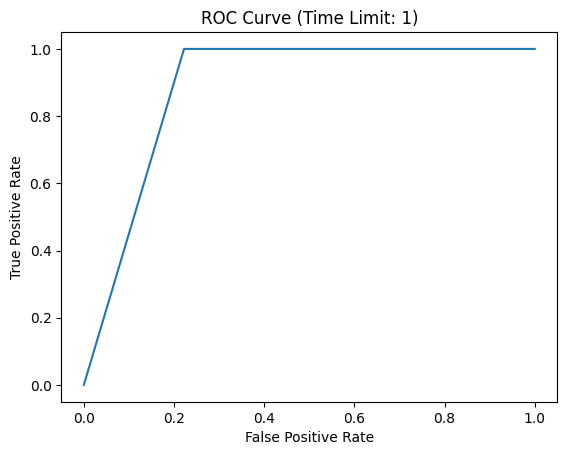

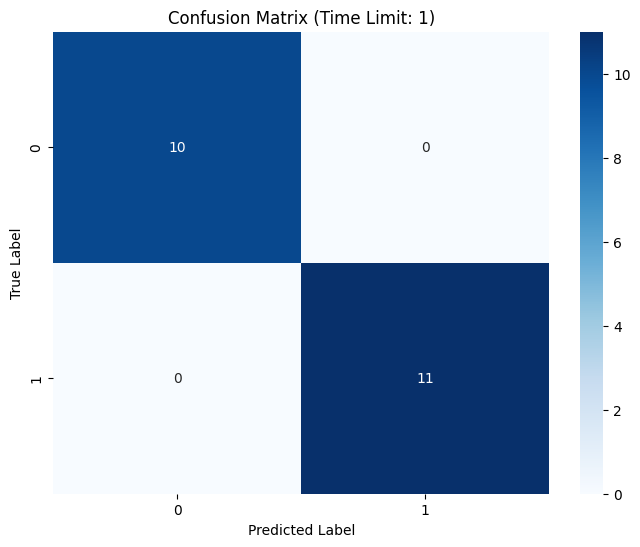

For time limit 2 and NMF features:
RF Accuracy: 0.9951923076923073
ROC AUC: 0.9960790355313641
Precision: 0.9878328727149964
Recall: 1.0
Confusion Matrix:
[[30  0]
 [ 0 21]]


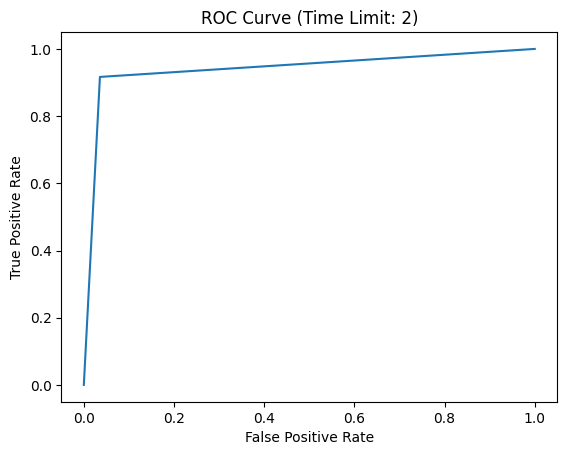

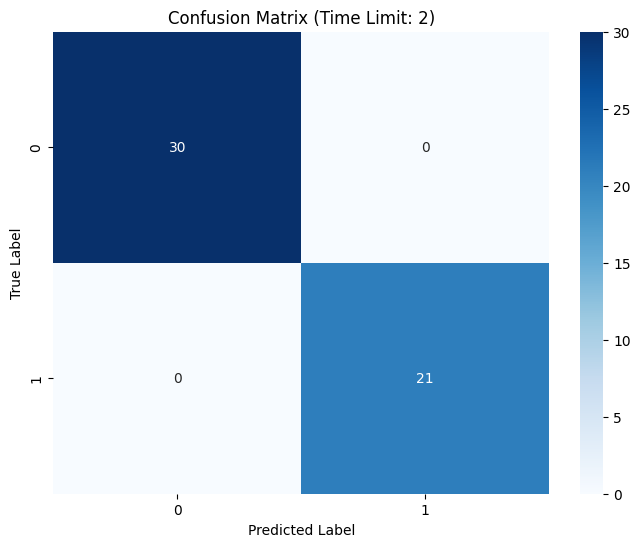

For time limit 4 and NMF features:
RF Accuracy: 0.9968493150684933
ROC AUC: 0.9975101469671642
Precision: 0.9911226215592744
Recall: 0.999231884057971
Confusion Matrix:
[[48  0]
 [ 0 23]]


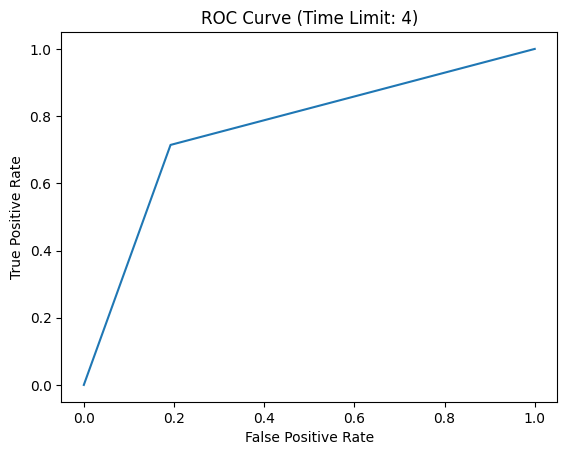

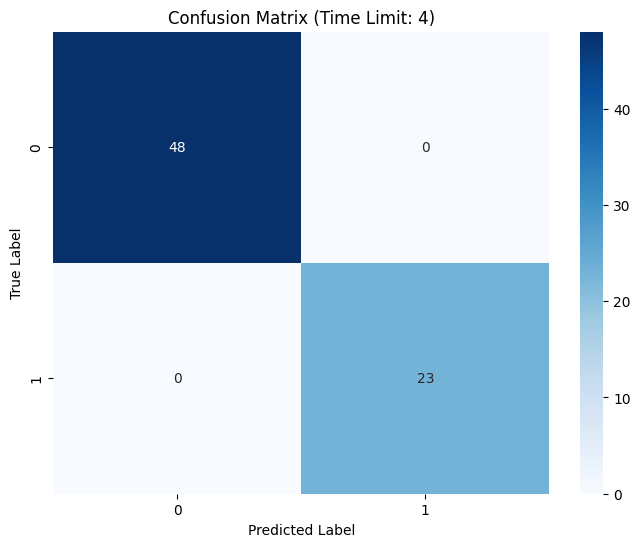

For time limit 5 and NMF features:
RF Accuracy: 0.9978749999999996
ROC AUC: 0.9982824102921678
Precision: 0.9938418808387155
Recall: 0.9995454545454545
Confusion Matrix:
[[54  0]
 [ 0 25]]


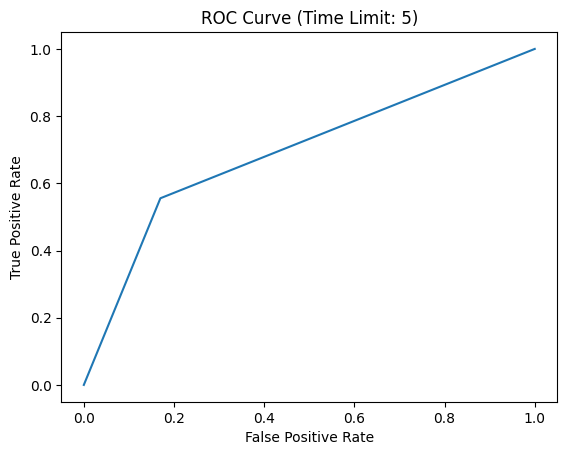

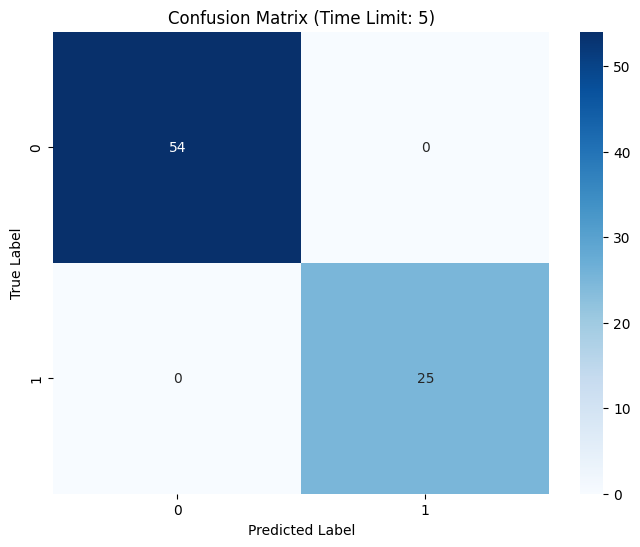

For time limit 6 and NMF features:
RF Accuracy: 0.9974698795180724
ROC AUC: 0.9979019408810771
Precision: 0.9928095776897876
Recall: 0.9988936781609197
Confusion Matrix:
[[57  0]
 [ 0 25]]


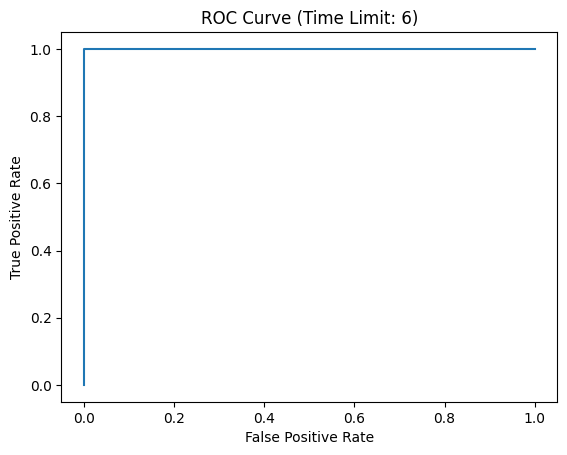

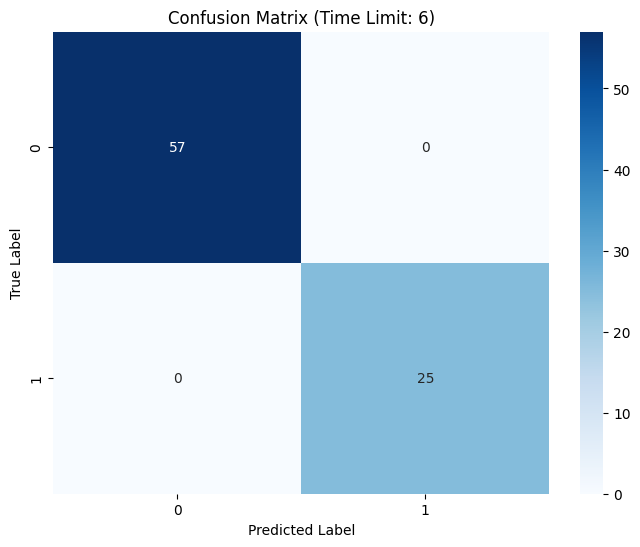

For time limit 8 and NMF features:
RF Accuracy: 0.9996551724137932
ROC AUC: 0.9997552439966327
Precision: 0.9988705570291778
Recall: 1.0
Confusion Matrix:
[[60  0]
 [ 0 26]]


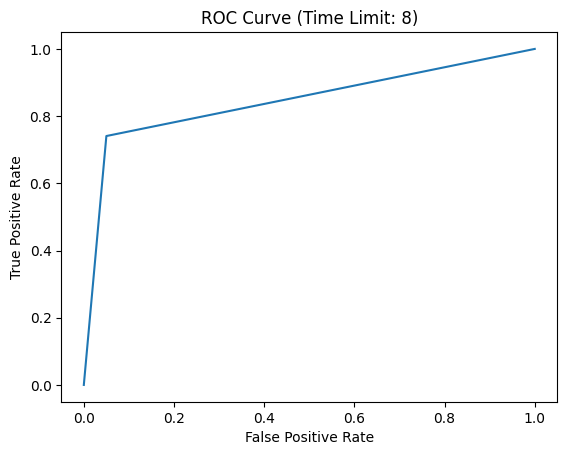

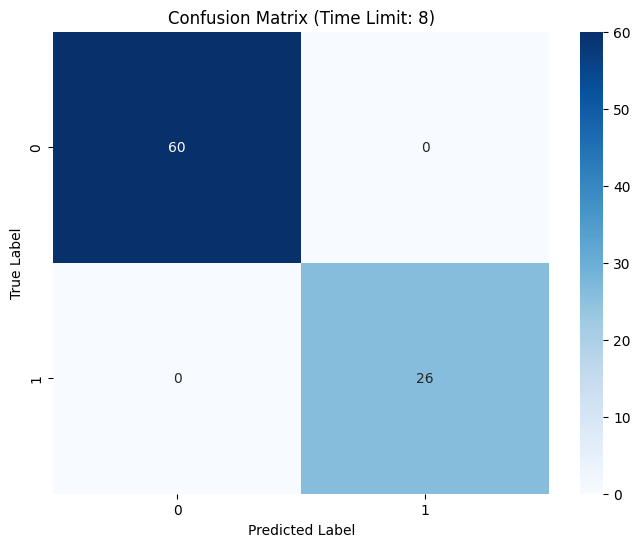

For time limit 7 and NMF features:
RF Accuracy: 0.9985882352941173
ROC AUC: 0.9985418108571292
Precision: 0.9965415360501566
Recall: 0.9983620680394872
Confusion Matrix:
[[58  0]
 [ 0 26]]


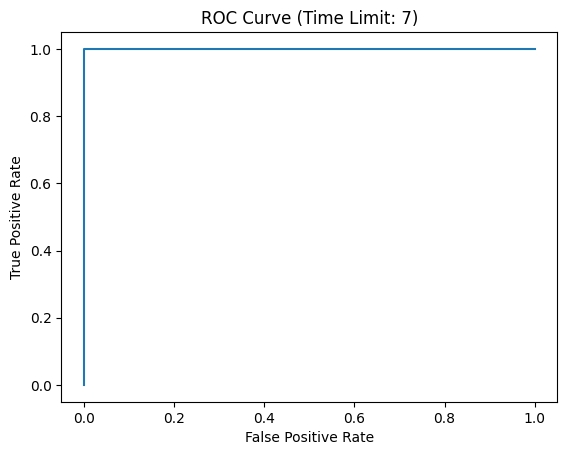

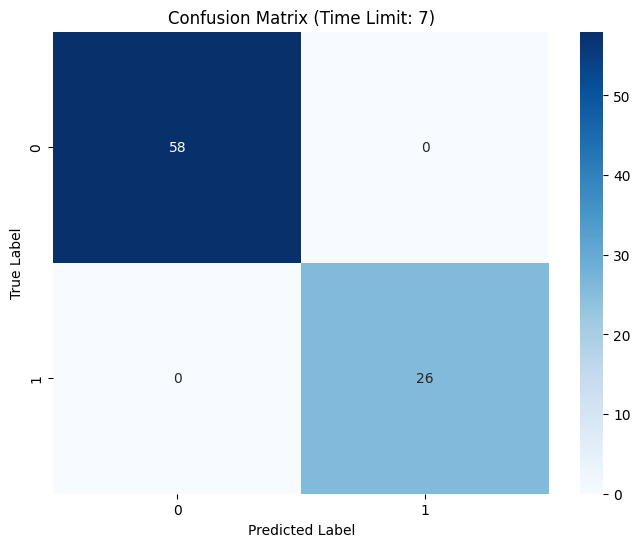

For time limit 10 and NMF features:
RF Accuracy: 0.9998863636363636
ROC AUC: 0.9998214285714286
Precision: 1.0
Recall: 0.9996428571428573
Confusion Matrix:
[[61  0]
 [ 0 26]]


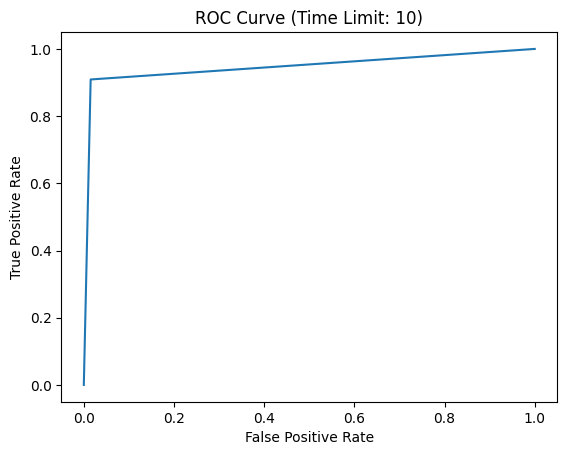

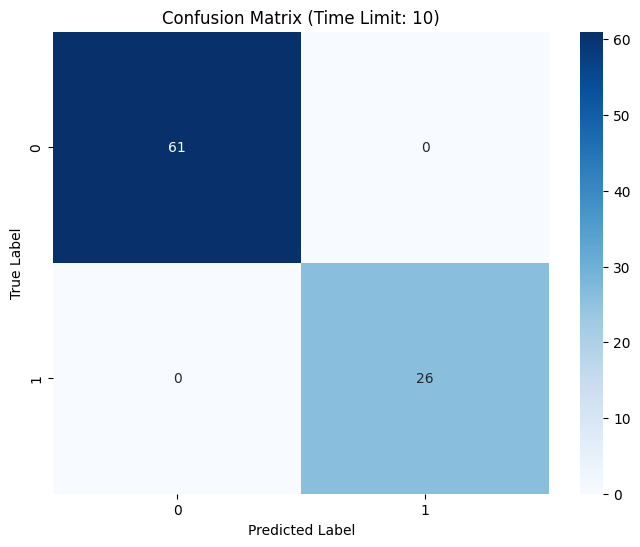

In [15]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Create the RAndom forest classifier object

def classification_lr(df,y):
    # Get features you select
    #X = df.drop(columns=['DSS.time', 'DSS'])
    #y = df['DSS']
    X=df
    y=y
    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    logistic_reg = LogisticRegression()
    # Train the model
    logistic_reg.fit(X_train, y_train)

    # Predict on the test set
    lr_predictions = logistic_reg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, lr_predictions)
    roc_auc = roc_auc_score(y_test, lr_predictions)
    precision = precision_score(y_test, lr_predictions)
    recall = recall_score(y_test, lr_predictions)
    confusion = confusion_matrix(y_test, lr_predictions)

    return accuracy, roc_auc, precision, recall, confusion, X_test, y_test
# Define the time limits
time_limits = [1,2,4,5,6,8, 7,10]

# Perform classification and compute ROC AUC for each time limit
for time_limit in time_limits:
    full_data=full_data[['gender', 'ajcc_pathologic_tumor_stage','DSS','DSS.time' ,'tumor_status','TP53',	'TTN',	'FAT1',	'MUC16','CLCA4','EGFR','Missense_Mutation',	'Nonsense_Mutation',	'Nonstop_Mutation',	'Splice_Site',	'age']]  # Replace with the actual feature columns
    data = full_data[full_data['DSS.time'] <= time_limit].reset_index(drop=True)
    X_reduced=data.drop(columns=['DSS.time', 'DSS'])
    y= data['DSS']
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns=['component_1', 'component_2', 'component_3','component_4','component_5','component_6'])
    df_reduced['DSS'] = data['DSS']
    df_reduced['DSS.time'] = data['DSS.time']
    accuracy_list = []
    roc_auc_list = []
    precision_list = []
    recall_list = []
    confusion_list = []
    X_test_final = None
    y_test_final = None
    for _ in range(100):
        accuracy, roc_auc, precision, recall, confusion, X_test, y_test = classification_lr(df_reduced,y)
        accuracy_list.append(accuracy)
        roc_auc_list.append(roc_auc)
        precision_list.append(precision)
        recall_list.append(recall)
        confusion_list.append(confusion)
        if X_test_final is None:
            X_test_final = X_test
            y_test_final = y_test
    
    mean_accuracy = sum(accuracy_list) / len(accuracy_list)
    mean_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
    mean_precision = sum(precision_list) / len(precision_list)
    mean_recall = sum(recall_list) / len(recall_list)
    mean_confusion = np.array(confusion_list).mean(axis=0).astype(int)

    print(f'For time limit {time_limit} and NMF features:')
    print(f'RF Accuracy: {mean_accuracy}')
    print(f'ROC AUC: {mean_roc_auc}')
    print(f'Precision: {mean_precision}')
    print(f'Recall: {mean_recall}')
    print(f'Confusion Matrix:')
    print(mean_confusion)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_final, rf_clf.predict_proba(X_test_final)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Time Limit: {time_limit})')
    plt.show()

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(mean_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix (Time Limit: {time_limit})')
    plt.show()

In [5]:
def classifcation_logistic(df):
    # get features you select
    X = df.drop(columns = ['DSS.time', 'DSS'])
    y = df['DSS']

    # Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # add classification
    # choose any classfication to do prediction
    # Define the model
    log_reg = LogisticRegression()

    # Train the model
    log_reg.fit(X_train, y_train)
    log_reg_predictions = log_reg.predict(X_test)

    # Evaluate the model
    return accuracy_score(y_test, log_reg_predictions)
    #print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_predictions))

In [6]:
for i in time_limit:
    data = full_data[full_data['DSS.time'] <= i]
    X_reduced = nmf.fit_transform(data)
    df_reduced = pd.DataFrame(X_reduced, columns= ['component_1', 'component_2', 'component_3'])
    df_reduced['DSS'] = full_data['DSS'].reset_index()['DSS']
    df_reduced['DSS.time'] = full_data['DSS.time'].reset_index()['DSS.time']
    lis = []
    for k in range(100):
        accuracy = classifcation_logistic(df_reduced)
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    print('For time limit ' + str(i) + ' and nmf features')
    print('Logistic Accuracy ' + str(mean_acc))

For time limit 1 and nmf features
Logistic Accuracy 0.705909090909091
For time limit 2 and nmf features
Logistic Accuracy 0.6930769230769233
For time limit 3 and nmf features
Logistic Accuracy 0.6777272727272725
For time limit 4 and nmf features
Logistic Accuracy 0.7054794520547947
For time limit 5 and nmf features
Logistic Accuracy 0.7184999999999999
For time limit 6 and nmf features
Logistic Accuracy 0.7084337349397587
For time limit 7 and nmf features
Logistic Accuracy 0.7051764705882352
For time limit 8 and nmf features
Logistic Accuracy 0.7090804597701154
For time limit 9 and nmf features
Logistic Accuracy 0.7122727272727271
For time limit 10 and nmf features
Logistic Accuracy 0.7154545454545455


# Log-rank test

In [22]:
def quantile_gene(df, x):
    q1 = df[x].quantile(0.1)
    q3 = df[x].quantile(0.9)
    df[x + 'binary'] = df[x].apply(lambda x: 0 if x <= q1 else 1 if x >= q3 else np.nan)

In [23]:
def logrank(df, lis,time):
    dic ={}
    data = df[df['DSS.time'] <= time]
    for i in lis:
        quantile_gene(data, i)
        low_expression = data[data[i + 'binary'] == 0]
        high_expression =  data[data[i +'binary'] == 1]
        # logrank
        results = logrank_test(high_expression['DSS.time'], low_expression['DSS.time'],
                       high_expression['DSS'], low_expression['DSS'])
        z_value = results.test_statistic
        if z_value > 1.96 or z_value < -1.96:
            dic[i] = z_value
    # return a dictionary of name and z value
    return dic

In [9]:
gene_expression = list(full_data.drop(columns = ['gender', 'ajcc_pathologic_tumor_stage', 'tumor_status', 'DSS' ,
                                      'DSS.time', 'Missense_Mutation', 'Nonsense_Mutation', 
                                      'Nonstop_Mutation', 'Splice_Site', 'age']).columns)

In [10]:
# for gene expression
logrank(full_data,gene_expression, 2) # example: use full data and 2 years as limit

{'TP53': 2.120617453561617,
 'TTN': 2.143271855534282,
 'CDKN2A': 3.1481755529943243,
 'PIK3CA': 4.680473121342188,
 'CASP8': 3.389085031356897,
 'XIRP2': 3.1703821360088784,
 'CUBN': 4.046813671678665,
 'MUC17': 3.646690183663279,
 'MUC5B': 2.0729664690136795,
 'PCDH15': 2.6959108383640076,
 'PCDH11X': 2.5834320206641146,
 'AHNAK2': 2.214970513627507,
 'FMN2': 2.615400302580672,
 'PKHD1': 2.104351556763302,
 'CDH10': 3.070610713909658,
 'EP300': 3.1299077752441216,
 'ANK2': 2.7759016074401215,
 'RYR1': 2.9064141544880564,
 'VCAN': 2.7374238783551403,
 'EGFR': 3.7419164805770855}

In [302]:
#select top n genes by sort z values as features from full_data

In [11]:
mutation = ['Missense_Mutation', 'Nonsense_Mutation', 'Nonstop_Mutation', 'Splice_Site']

In [12]:
# for mutation
logrank(full_data,mutation, 2) # example: use full data and 2 years as limit

{'Missense_Mutation': 2.2088500784074974,
 'Nonsense_Mutation': 1.9839793008189441,
 'Splice_Site': 5.71020812335661}

# Cox model

In [13]:
def coxfitter(data, duration, event):
    # Define the CoxPHFitter object
    cph = CoxPHFitter()
    # Fit the model to your data
    cph.fit(data, duration_col= duration, event_col=event)
    summary = cph.summary
    return summary

In [14]:
def cox_model(df, time, lis):
    data = df[df['DSS.time'] <= time]
    signi = []
    pvals = []
    pvals_correct = []
    for i in lis:
        summary = coxfitter(data[[i ,'gender','ajcc_pathologic_tumor_stage', 
                                   'tumor_status', 'age', 'DSS.time', 'DSS']], 'DSS.time', 'DSS')
        p_values = summary["p"]
        rejected, pvals_corrected = multipletests(p_values, method='fdr_bh')[:2]
        summary['p_corrected'] = pvals_corrected
        p = summary.loc[i, "p"]
        p_correct = summary.loc[i, "p_corrected"]
        pvals.append(p)
        pvals_correct.append(p_correct)
        signi.append(rejected[0])
    features = [col for col in lis]  # list of features
    # Create a DataFrame with the results
    results = pd.DataFrame({'Features': features,'p': pvals,'p_corrected': pvals_correct, 'significant': signi})
    return results[results['significant'] == True]


In [15]:
# gene expression level
cox_model(full_data, 2, gene_expression )# example: use full data and 2 years as limit

,Features,p,p_corrected,significant
19,CASP8,2.297870e-03,1.148935e-02,True
42,DNAH9,3.421607e-03,1.710804e-02,True
43,DNAH11,3.413931e-03,1.706965e-02,True
46,LRP2,1.491141e-38,7.455703e-38,True
54,RP1,2.284010e-03,1.142005e-02,True
59,DNAH7,7.134398e-03,3.567199e-02,True
83,MDN1,8.718074e-03,4.359037e-02,True


In [16]:
# mutation
cox_model(full_data, 2, mutation)# example: use full data and 2 years as limit

,Features,p,p_corrected,significant
0,Missense_Mutation,4.747304e-08,2.373652e-07,True
1,Nonsense_Mutation,3.141682e-04,1.570841e-03,True
2,Nonstop_Mutation,8.020092e-03,4.010046e-02,True
3,Splice_Site,3.520589e-05,1.760294e-04,True


# Classification

In [318]:
#select top n mutations by z values as features columns from full_data

In [60]:
#def classifcation_svm(df, features):
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.multitest import multipletests
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# get features you select
X = X_reduced
y = full_data['DSS']

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# SVM

# Define the model
svm_clf = svm.SVC()

# Train the model
svm_clf.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm_clf.predict(X_test)

# Evaluate the model
#return accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

SVM Accuracy: 0.6888888888888889


In [30]:
X = full_data
y = full_data['DSS']

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# SVM

# Define the model
svm_clf = svm.SVC()

# Train the model
svm_clf.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm_clf.predict(X_test)

# Evaluate the model
#return accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

SVM Accuracy: 0.7333333333333333


In [ ]:
for i in time_limit:
    lis = []
    for k in range(10000):
        accuracy = classifcation_svm(full_data, feature_dic[i])
        lis.append(accuracy)
    mean_acc = sum(lis)/len(lis)
    print('For time limit ' + str(i) + ' and gene expression features from Cox model')
    print('SVM Accuracy ' + str(mean_acc))

In [6]:
pip install deepsurv

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 2.8 MB 16.0 MB/s eta 0:00:01
  Created wheel for deepsurv: filename=deepsurv-0.1.0-py3-none-any.whl size=11163 sha256=466c38c2e46dc5e789c9976ecd16fed8d462583876c293cbdd523917f6f981fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-n70xzz7s/wheels/8b/35/64/cb4fa77f7de25e6133c42cc1749ecd28b82131fcc937ab37ee
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668094 sha256=ada06ea1dd9034eedd839a505e6ab6f1cb2b0b5f3fd8f608599e6f4c3ea374b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-n70xzz7s/wheels/84/cb/19/235b5b10d89b4621f685112f8762681570a9fa14dc1ce904d9
Successfully built deepsurv theano
Note: you may need to restart the kernel to use updated packages.


In [27]:
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation
from lifelines.utils import concordance_index

import numpy as np
import pandas as pd
X = full_data[['gender', 'ajcc_pathologic_tumor_stage','DSS', 'tumor_status','TP53',	'TTN',	'FAT1',	'MUC16','CLCA4','EGFR','Missense_Mutation',	'Nonsense_Mutation',	'Nonstop_Mutation',	'Splice_Site',	'age']]  # Replace with the actual feature columns
y = full_data['DSS.time']  # Replace with the column representing time-to-event
# Define the Cox-Nnet model
cox_nnet_model = CoxPHFitter(n_iter=1000, l2_reg=0.01)

# Fit the model to the data
cox_nnet_model.fit(X, 'survival_time', event_col='DSS', show_progress=True)  # Replace 'event' with your actual event indicator column

# Calculate the concordance index (C-index) as a measure of model performance
c_index = concordance_index(cox_nnet_model.durations, -cox_nnet_model.predict_partial_hazard(cox_nnet_model.data).values.flatten(), cox_nnet_model.event_observed)
print(f'C-index: {c_index}')

# Perform k-fold cross-validation
scores = k_fold_cross_validation(cox_nnet_model, X, 'survival_time', event_col='DSS', k=5)  # Replace 'event' with your actual event indicator column
average_score = np.mean(scores)
print(f'Average cross-validated C-index: {average_score}')
'''
E = full_data['DSS']  # Replace with the column representing event indicator


# Split the dataset into training and testing sets
X_train, X_test, T_train, T_test, E_train, E_test = train_test_split(
    X, T, E, test_size=0.2, seed=0
)

# Define the DeepSurv model architecture
hyperparams = {'L2_reg': 1e-4, 'batch_norm': True, 'dropout': 0.2}
architecture = [
    {'activation': 'relu', 'num_units': 100},
    {'activation': 'relu', 'num_units': 100},
]

# Train the DeepSurv model
model = deep_surv.DeepSurv(architecture=architecture, hyperparams=hyperparams)
model.fit(X_train, T_train, E_train, num_epochs=100)

# Evaluate the model
c_index = model.concordance_index(X_test, T_test, E_test)
#print("Concordance Index:", c_index)
'''


TypeError: __init__() got an unexpected keyword argument 'n_iter'

In [1]:
pip install h5py>=2.7.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install logger==1.4

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py) ... done
  Created wheel for logger: filename=logger-1.4-py3-none-any.whl size=1758 sha256=d8ce13cc2ecfbb5bbe60c36468df1670cecaf6f1a02d041bf3350da082d17952
  Stored in directory: /tmp/pip-ephem-wheel-cache-wmjqlnmy/wheels/4c/62/b0/eb01dd1d29b9daccb651817618f8846e40384e45833f6aaf6d
Successfully built logger
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install Optunity>=1.1.1

Note: you may need to restart the kernel to use updated packages.


In [23]:
import theano 


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/gputest/.conda/envs/torch/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_29988/3470119688.py", line 1, in <module>
    import theano
  File "/home/gputest/.conda/envs/torch/lib/python3.8/site-packages/theano/__init__.py", line 76, in <module>
    from theano.scan_module import scan, map, reduce, foldl, foldr, clone
  File "/home/gputest/.conda/envs/torch/lib/python3.8/site-packages/theano/scan_module/__init__.py", line 40, in <module>
    from theano.scan_module import scan_opt
  File "/home/gputest/.conda/envs/torch/lib/python3.8/site-packages/theano/scan_module/scan_opt.py", line 59, in <module>
    from theano import tensor, scalar
  File "/home/gputest/.conda/envs/torch/lib/python3.8/site-packages/theano/tensor/__init__.py", line 6, in <module>
    from theano.tensor.basic import *
  File "/home/gputest/.conda/envs/torc

In [20]:

conda install m2w64-toolchain


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - m2w64-toolchain

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifelines import CoxPHFitter
from keras.models import Sequential
from keras.layers import Dense

# Load and preprocess the dataset
dataset = pd.read_csv('Full Data.txt')
#X = dataset.drop(['DSS.time', 'DSS'], axis=1)
X = dataset[['gender', 'ajcc_pathologic_tumor_stage', 'tumor_status','TP53','TTN','FAT1','MUC16','CLCA4','EGFR','Missense_Mutation',	'Nonsense_Mutation',	'Nonstop_Mutation',	'Splice_Site',	'age']]  # Replace with the actual feature columns

y = dataset[['DSS.time', 'DSS']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the feedforward neural network
input_dim = X_train_scaled.shape[1]
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled, y_train['DSS.time'], epochs=10, batch_size=32)

# Extract the learned representations from the hidden layers
hidden_layer_outputs = model.predict(X_train_scaled)

# Combine the learned representations with the survival data
X_train_combined = np.concatenate((X_train_scaled, hidden_layer_outputs), axis=1)

# Fit the Cox proportional hazards model
cox_nnet = CoxPHFitter()
cox_nnet.fit(pd.DataFrame(X_train_combined), duration_col=dataset[['DSS.time']], event_col=dataset[['DSS']])

# Predict survival probabilities for the test set
hidden_layer_outputs_test = model.predict(X_test_scaled)
X_test_combined = np.concatenate((X_test_scaled, hidden_layer_outputs_test), axis=1)
survival_probs = cox_nnet.predict_survival_function(pd.DataFrame(X_test_combined))

# Evaluate the model
c_index = cox_nnet.score(pd.DataFrame(X_test_combined), y_test, scoring_method="concordance_index")
print("Concordance Index: ", c_index)


Epoch 1/10
12/12 [==============================] - 1s 1ms/step - loss: 10.5587
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 8.3932
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 7.3197
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 6.6885
Epoch 5/10
12/12 [==============================] - 0s 1ms/step - loss: 6.2632
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 5.9638
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 5.7065
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 5.5584
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 5.4240
Epoch 10/10
12/12 [==============================] - 0s 1ms/step


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [7]:
import numpy as np
from deepsurv import deep_surv
from deepsurv.datasets import load_rgbsg
from deepsurv.utils import train_test_split

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('[INFO] Training CoxMLP')? (deep_surv.py, line 326)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already prepared your dataset
# X: Features (input variables)
# y: Target variable (clinical outcome)
X = dataset[['gender', 'ajcc_pathologic_tumor_stage', 'tumor_status','TP53','TTN','FAT1','MUC16','CLCA4','EGFR','Missense_Mutation',	'Nonsense_Mutation',	'Nonstop_Mutation',	'Splice_Site',	'age']]  # Replace with the actual feature columns

y = dataset[['DSS.time', 'DSS']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have already prepared your dataset
# X: Features (input variables)
# y_time: Survival time
# y_event: Event indicator (0: censored, 1: event occurred)
X = dataset[['gender', 'ajcc_pathologic_tumor_stage', 'tumor_status','TP53','TTN','FAT1','MUC16','CLCA4','EGFR','Missense_Mutation',	'Nonsense_Mutation',	'Nonstop_Mutation',	'Splice_Site',	'age']]  # Replace with the actual feature columns

y_time = dataset[['DSS.time']]
y_event= dataset[['DSS']]
# Split the data into training and testing sets
X_train, X_test, y_time_train, y_time_test, y_event_train, y_event_test = train_test_split(
    X, y_time, y_event, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
model = xgb.XGBRegressor(objective='survival:cox', eval_metric='cox-nloglik')

# Train the model
model.fit(X_train, y_time_train, event=y_event_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the concordance index (C-index)
cindex = model.score(X_test, y_time_test, y_event_test)
print("Concordance Index (C-index):", cindex)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_time_test, predictions)
print("Mean Squared Error (MSE):", mse)


TypeError: fit() got an unexpected keyword argument 'event'